In [1]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [2]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding="utf-8") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [3]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [4]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [5]:

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [6]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [96]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step,)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
   

In [8]:
number_of_topics=7
words=10
document_list,titles=load_data("","theater_play.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 27292
[(0, '-0.413*"sahnesi" + -0.405*"0" + -0.391*"41" + -0.291*"28" + -0.268*"yetişkin" + -0.244*"yerli" + -0.175*"yabancı" + -0.170*"29" + -0.167*"2019" + -0.132*"çocuk"'), (1, '-0.490*"29" + 0.433*"28" + -0.207*"üsküdar" + -0.207*"yetişkin" + 0.166*"çocuk" + -0.149*"019561" + -0.149*"0129" + -0.147*"40" + -0.147*"musahipzad" + -0.147*"celãl"'), (2, '0.450*"yerli" + -0.447*"yabancı" + 0.407*"çocuk" + -0.278*"yetişkin" + -0.167*"harbiy" + -0.164*"046788" + -0.164*"988829" + -0.164*"ertuğrul" + -0.164*"muhsin" + 0.101*"916482"'), (3, '0.336*"0159" + 0.336*"956194" + 0.332*"reşat" + 0.332*"fatih" + 0.332*"nuri" + -0.190*"harbiy" + -0.187*"988829" + -0.187*"046788" + -0.186*"ertuğrul" + -0.186*"muhsin"'), (4, '0.308*"40" + 0.305*"023408" + 0.305*"99177" + 0.302*"haldun" + 0.302*"kadıköi" + 0.302*"taner" + -0.268*"üsküdar" + -0.256*"41" + -0.215*"019561" + -0.215*"0129"'), (5, '-0.346*"079366" + -0.346*"970972" + -0.343*"kağıthan" + -0.319*"sadabad" + 0.259*"ha

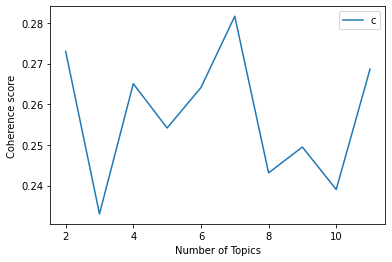

In [97]:
start,stop,step= 2, 12, 1
plot_graph(clean_text,start,stop,step)

In [9]:
from gensim.models import LsiModel
from snowballstemmer import TurkishStemmer
import pandas as pd
import re
import nltk

In [10]:
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))

In [11]:
f = open('theater_play.csv', 'r', encoding='utf8')
doc = f.read()

freq(doc)

Frequency of PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE is : 1
Frequency of 2017-11-07,SAADET is : 2
Frequency of HANIM,Ümraniye is : 89
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,35 is : 9
Frequency of 2020-11-06,BİR is : 1
Frequency of GÜN is : 426
Frequency of AYAKKABIMIN is : 426
Frequency of TEKİ,Kağıthane is : 188
Frequency of Sadabad is : 3553
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,4 is : 57
Frequency of 2018-01-17,KARAGÖZ is : 1
Frequency of ÇİFTLİK is : 400
Frequency of BEKÇİSİ,Kağıthane is : 134
Frequency of Küçük is : 485
Frequency of Kemal is : 485
Frequency of Çocuk is : 1065
Frequency of Tiyatrosu is : 1065
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,30 is : 16
Frequency of 2018-01-19,NORA is : 2
Frequency of - is : 2019
Frequency of BİR is : 2160
Frequency of BEBEK is : 884
Frequency of EVİ,Kadıköy is : 92
Frequency of Haldun is : 2528
Frequency of Taner is : 2528


Frequency of 2019-03-07,BENİM is : 1
Frequency of GÜZEL is : 417
Frequency of PABUÇLARIM,Gaziosmanpaşa is : 23
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,8 is : 38
Frequency of 2018-05-09,SANSÜRCÜ is : 1
Frequency of (YILDIZ is : 9
Frequency of TEKNİK is : 17
Frequency of OYUNCULARI),Üsküdar is : 22
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023817,41.017064,3 is : 4
Frequency of 2019-10-18,KARINCALAR is : 2
Frequency of SAVAŞ is : 1025
Frequency of VARDI,Gaziosmanpaşa is : 224
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,17 is : 21
Frequency of 2020-01-04,BİSKÜVİ is : 2
Frequency of ADAM,Gaziosmanpaşa is : 113
Frequency of 2018-11-23,ÜÇ is : 1
Frequency of KARDEŞ is : 357
Frequency of MUHTEŞEM is : 357
Frequency of KURT,Kağıthane is : 98
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,16 is : 16
Frequency of 2019-03-18,AŞK is : 1
Frequency of ZAMANLAR is : 92
Frequency of (GAZALE),Üsküdar is : 33
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,5

Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,35 is : 13
Frequency of 2020-02-19,PERİKIZ,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,37 is : 3
Frequency of 2019-04-03,ŞAHANE is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,184 is : 1
Frequency of 2019-10-20,UZLAŞMA,Sultangazi is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,8 is : 18
Frequency of 2019-04-08,MEVLANA'DAN is : 1
Frequency of ÖYKÜLER,Sultangazi is : 18
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,19 is : 10
Frequency of 2018-02-23,BİR is : 2
Frequency of TEKİ,Üsküdar is : 87
Frequency of Sahnesi,Çocuk,0,Yerli,29.023817,41.017064,15 is : 8
Frequency of 2019-12-26,YAŞASIN is : 2
Frequency of BARIŞ,Gaziosmanpaşa is : 143
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,15 is : 15
Frequency of 2018-12-31,POLLYANNA,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,29 is : 3
Frequency of 2018-11-15,ON is : 1
Frequ

Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,59 is : 9
Frequency of 2019-10-25,İKİ is : 2
Frequency of EFENDİNİN is : 189
Frequency of UŞAĞI,Kağıthane is : 99
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,145 is : 1
Frequency of 2019-12-26,HAYAL-İ is : 3
Frequency of TEMSİL,Harbiye is : 113
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,60 is : 8
Frequency of 2019-01-02,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,66 is : 3
Frequency of 2018-11-28,ÜZGÜN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,37 is : 12
Frequency of 2019-03-29,KARAGÖZ is : 1
Frequency of BEKÇİSİ,Kadıköy is : 28
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,253 is : 1
Frequency of 2018-12-29,SÖZ is : 1
Frequency of VERİYORUM,Fatih is : 108
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,45 is : 14
Frequency of 2020-02-04,HARİKALAR is : 2
Frequency of MUTFAĞI,Fatih is : 68
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,

Frequency of EFENDİ,Üsküdar is : 28
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,3 is : 4
Frequency of 2020-01-16,BEN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,38 is : 16
Frequency of 2018-11-05,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,11 is : 32
Frequency of 2017-11-26,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,136 is : 5
Frequency of 2019-12-18,BİSKÜVİ is : 5
Frequency of ADAM,Kadıköy is : 160
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023408,40.99177,52 is : 1
Frequency of 2019-11-24,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,20 is : 11
Frequency of 2017-09-23,SIZI,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,40 is : 18
Frequency of 2017-10-19,DEDEKTİF is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,51 is : 4
Frequency of 2018-11-06,SON,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,47 is : 8
Freque

Frequency of 2018-09-30,SAADET is : 2
Frequency of HANIM,Üsküdar is : 17
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,89 is : 5
Frequency of 2018-01-16,KOMİK-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,32 is : 15
Frequency of 2019-02-08,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,2 is : 49
Frequency of 2017-12-17,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023408,40.99177,53 is : 1
Frequency of 2019-05-28,HASTALIK is : 1
Frequency of Cemil is : 176
Frequency of Topuzlu is : 176
Frequency of Açıkhava is : 176
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.99044,41.045777,154 is : 1
Frequency of 2018-10-29,CAN is : 2
Frequency of YELEĞİ,Fatih is : 110
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,26 is : 9
Frequency of 2019-11-08,NORA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,17 is : 7
Frequency of 2020-02-20,FELATUN is : 1
Frequency of EFENDİ,Sultangazi is : 80
Frequency of Sahnesi,Müz

Frequency of 2018-03-29,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,128 is : 2
Frequency of 2018-03-26,SON,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,43 is : 10
Frequency of 2017-10-25,SAADET is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,32 is : 23
Frequency of 2020-01-10,YAŞAYAN is : 2
Frequency of SAYFALAR,Sultangazi is : 41
Frequency of 2018-12-01,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,52 is : 10
Frequency of 2018-12-26,OCAK'TA is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,24 is : 10
Frequency of 2019-12-28,BENİM is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,3 is : 17
Frequency of 2018-09-29,KOMİK-İ is : 2
Frequency of 2019-04-15,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,68 is : 10
Frequency of 2018-03-26,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,213 is : 1
Frequency 

Frequency of PRENS,Sultangazi is : 114
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,320 is : 1
Frequency of 2017-11-13,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,139 is : 3
Frequency of 2018-09-28,KARINCALAR is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,19 is : 13
Frequency of 2020-09-23,HAYAL is : 1
Frequency of SATICISI is : 5
Frequency of AYSA is : 18
Frequency of PRODÜKSİYON is : 5
Frequency of TİYATROSU," is : 54
Frequency of TİYATRO",Yetişkin,0,Yerli,28.956194,41.0159,27 is : 1
Frequency of 2020-02-09,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,8 is : 21
Frequency of 2017-10-28,GEÇ is : 3
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,86 is : 5
Frequency of 2018-01-05,SIZI,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,66 is : 5
Frequency of 2019-12-25,ÜZGÜN is : 4
Frequency of ÜLKESİ,Üsküdar is : 61
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,22 i

Frequency of 2019-03-04,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,63 is : 11
Frequency of 2020-01-04,BENİM is : 3
Frequency of PABUÇLARIM,Üsküdar is : 93
Frequency of 2019-01-12,KOMİK-İ is : 2
Frequency of BEY,Kadıköy is : 18
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,1 is : 100
Frequency of 2019-01-02,ÜZGÜN is : 1
Frequency of ÜLKESİ,Kadıköy is : 55
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,112 is : 3
Frequency of 2017-10-28,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,65 is : 5
Frequency of 2018-01-28,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,44 is : 5
Frequency of 2020-01-13,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,62 is : 7
Frequency of 2019-05-08,YAŞANMAZ is : 1
Frequency of (KOCAELİ is : 9
Frequency of GSF is : 59
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.0129,41.019561,5 is : 4
Frequency of 2018-11-06,NORA is : 3
Frequency of 2020-10-21,FISI

Frequency of 2020-01-08,UZLAŞMA,Gaziosmanpaşa is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,3 is : 20
Frequency of 2019-11-21,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,116 is : 6
Frequency of 2019-10-28,İKİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,90 is : 6
Frequency of 2019-10-04,"AY, is : 1
Frequency of CARMELA!",Kadıköy is : 25
Frequency of 2018-04-16,MASAL is : 2
Frequency of TRENİ is : 9
Frequency of (PINAR is : 9
Frequency of ÇOCUK is : 47
Frequency of TİYATROSU),Gaziosmanpaşa is : 13
Frequency of Sahnesi,Çocuk,1,Yerli,28.916482,41.057846,12 is : 2
Frequency of 2020-01-17,HAYAL-İ is : 3
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,4 is : 14
Frequency of 2018-11-30,KOMİK-İ is : 1
Frequency of 2019-09-30,BEN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,2 is : 26
Frequency of 2020-02-06,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,12

Frequency of 2018-10-08,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,39 is : 3
Frequency of 2020-03-02,"AY, is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,64 is : 5
Frequency of 2019-10-27,YAŞASIN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,27 is : 3
Frequency of 2019-02-18,ELMA is : 1
Frequency of KIRTIK,Kadıköy is : 48
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,7 is : 7
Frequency of 2019-10-23,HİSSE-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,156 is : 2
Frequency of 2019-10-06,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,41 is : 13
Frequency of 2019-10-25,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,22 is : 18
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,182 is : 2
Frequency of 2018-01-03,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,19 is : 28
Frequency of 2019-04-15,HİSSE-İ is : 1
Freque

Frequency of YAZDÖNÜMÜ is : 12
Frequency of GECESİ is : 12
Frequency of RÜYASI is : 19
Frequency of (İTALYAN is : 12
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.104798,41.025025,2 is : 22
Frequency of 2017-12-19,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,1064 is : 1
Frequency of 2018-09-26,BİZİM is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,41 is : 4
Frequency of 2019-12-11,BİR is : 2
Frequency of HİKAYESİ,Gaziosmanpaşa is : 59
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,21 is : 13
Frequency of 2019-12-21,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,25 is : 3
Frequency of 2020-10-19,MELEK,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,33 is : 2
Frequency of 2019-02-26,FELATUN is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,2813 is : 1
Frequency of 2017-12-30,SAADET is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,59 is : 3
Frequency of 2017-11-07,

Frequency of 2020-01-15,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,11 is : 10
Frequency of 2018-09-21,BİZİM is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,111 is : 1
Frequency of 2017-12-28,BİR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,57 is : 7
Frequency of 2018-03-31,BEN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,180 is : 2
Frequency of 2017-12-25,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,134 is : 3
Frequency of 2019-03-31,GEÇ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,9 is : 22
Frequency of 2018-02-16,ÜZGÜN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,78 is : 1
Frequency of 2017-10-31,HAYAL-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,15 is : 7
Frequency of 2020-11-07,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2018-03-07,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,4 is : 9
Frequenc

Frequency of 2020-10-27,AKCİĞER is : 1
Frequency of TİYATRO.İN," is : 4
Frequency of TİYATRO.İN",Yetişkin,0,Yabancı,29.0129,41.019561,137 is : 1
Frequency of 2019-03-27,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,19 is : 17
Frequency of 2020-01-13,BİR is : 4
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,20 is : 17
Frequency of 2019-11-27,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,41 is : 8
Frequency of 2019-02-20,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,3 is : 30
Frequency of 2018-12-01,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,74 is : 4
Frequency of 2019-09-20,BEN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,77 is : 4
Frequency of 2017-11-09,ÇİNGENELER is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,26 is : 2
Frequency of 2018-01-26,ÜÇ is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,14 is : 15
Frequency of 2020-10-10,

Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,2 is : 10
Frequency of 2020-10-08,HAYAL is : 1
Frequency of TİYATRO",Yetişkin,0,Yerli,28.956194,41.0159,2 is : 1
Frequency of 2018-11-20,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,296 is : 1
Frequency of 2017-11-22,ŞEKERPARE,Harbiye is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,343 is : 1
Frequency of 2019-04-02,GEÇ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,19 is : 11
Frequency of 2020-01-15,KOMİK-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,76 is : 2
Frequency of 2019-12-10,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,158 is : 2
Frequency of 2020-01-06,BİSKÜVİ is : 3
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,4 is : 12
Frequency of 2019-12-16,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,4 is : 12
Frequency of 2020-01-31,UZLAŞMA,Gaziosmanpaşa is : 1
Frequency of Sahnesi

Frequency of 2017-12-20,SIZI,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,62 is : 3
Frequency of 2017-09-25,SIZI,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,71 is : 7
Frequency of 2017-09-28,YANGIN is : 1
Frequency of ORKİDELER,Gaziosmanpaşa is : 66
Frequency of 2018-12-19,ÜZGÜN is : 1
Frequency of ÜLKESİ,Ümraniye is : 34
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,9 is : 11
Frequency of 2018-01-11,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,64 is : 5
Frequency of 2019-11-22,BİR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,76 is : 2
Frequency of 2019-02-12,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,17 is : 8
Frequency of 2019-09-27,AMANVERMEZ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,97 is : 1
Frequency of 2018-01-20,BİR is : 3
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,328 is : 1
Frequency of 2020-11-08,ZEHİR,Fa

Frequency of 2019-12-02,MACBETH,Üsküdar is : 1
Frequency of 2018-03-25,SAADET is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,15 is : 10
Frequency of 2018-02-26,AY is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,81 is : 4
Frequency of 2019-03-23,SÖZ is : 2
Frequency of 2019-10-09,BEN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,85 is : 5
Frequency of 2018-12-10,NORA is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,112 is : 4
Frequency of 2019-02-14,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,93 is : 4
Frequency of 2019-03-03,MACBETH,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,116 is : 3
Frequency of 2019-03-12,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,122 is : 3
Frequency of 2020-01-24,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,22 is : 10
Frequency of 2018-12-02,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Ye

Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,91 is : 7
Frequency of 2020-02-22,HASTALIK is : 2
Frequency of 2019-12-01,"AY, is : 2
Frequency of 2018-02-21,KARAGÖZ' is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,31 is : 10
Frequency of 2018-01-13,ÜÇ is : 2
Frequency of 2018-10-02,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,14 is : 30
Frequency of 2018-09-23,İKİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,14 is : 9
Frequency of 2018-02-22,HAYAL-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,76 is : 8
Frequency of 2018-01-16,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,39 is : 14
Frequency of 2019-01-14,HARİKALAR is : 1
Frequency of 2018-09-27,CİBALİ is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,109 is : 1
Frequency of 2018-03-25,BİZİM is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,86 is : 3
Frequency of 2018-10-08,KARINCAL

Frequency of 2017-11-09,PALYAÇO is : 1
Frequency of 2017-12-21,YANGIN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,78 is : 2
Frequency of 2018-03-30,KARINCALAR is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,36 is : 3
Frequency of 2020-01-26,BEN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,23 is : 22
Frequency of 2018-09-20,İKİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,176 is : 1
Frequency of 2019-12-28,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,38 is : 7
Frequency of 2018-03-10,SIZI,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,73 is : 3
Frequency of 2019-05-16,OTOBÜS is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.956194,41.0159,39 is : 1
Frequency of 2018-10-27,SAADET is : 2
Frequency of 2020-01-21,BİR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,46 is : 10
Frequency of 2018-04-16,POLLYANNA,Ümraniye is : 1
Frequency of 2020-10-20,

Frequency of Sahnesi,Çocuk,0,Yabancı,28.8765777,41.09774468,24 is : 1
Frequency of 2018-04-01,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,36 is : 4
Frequency of 2019-04-07,BEN is : 1
Frequency of 2019-02-14,KARINCALAR is : 2
Frequency of 2020-01-07,YAŞAYAN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,18 is : 6
Frequency of 2019-01-26,SÖZ is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,58 is : 5
Frequency of 2019-05-07,OTHELLO is : 1
Frequency of (GÜNGÖREN is : 18
Frequency of ERDEM is : 9
Frequency of BEYAZIT is : 9
Frequency of 2019-11-01,ÜZGÜN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,52 is : 6
Frequency of 2018-03-20,REİS is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,87 is : 4
Frequency of 2019-04-06,"İSTANBUL is : 2
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,13 is : 5
Frequency of 2019-02-05,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,60 is : 1

Frequency of 2019-02-12,MEVLANA'DAN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,24 is : 7
Frequency of 2019-03-01,TATLI is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,22 is : 7
Frequency of 2020-01-22,RÜYA,Fatih is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,39 is : 10
Frequency of 2018-11-25,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,103 is : 2
Frequency of 2018-04-09,MATRUŞKA,Kadıköy is : 1
Frequency of 2018-01-03,KARAGÖZ is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,17 is : 13
Frequency of 2018-09-23,SON,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,75 is : 2
Frequency of 2018-04-23,KOMİK-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,36 is : 17
Frequency of 2020-10-06,SOĞUKTAN is : 1
Frequency of GEÇ",Çocuk,0,Yabancı,28.970972,41.079366,10 is : 2
Frequency of 2017-12-22,MACBETH,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41

Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,28 is : 7
Frequency of 2019-12-31,BENİM is : 3
Frequency of 2020-01-08,ÇIN is : 5
Frequency of 2020-10-01,ZEHİR,Kadıköy is : 1
Frequency of 2019-09-24,AMANVERMEZ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,107 is : 2
Frequency of 2018-12-20,KOMİK-İ is : 1
Frequency of 2019-01-11,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,54 is : 5
Frequency of 2018-12-11,ŞAHANE is : 1
Frequency of 2019-12-22,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2019-11-30,AY is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,63 is : 6
Frequency of 2018-01-04,KAHVEDE is : 2
Frequency of 2018-01-18,HARİKALAR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,91 is : 2
Frequency of 2018-05-18,LE is : 1
Frequency of TARTUFFE is : 2
Frequency of ''TARTÜF'' is : 2
Frequency of (ÖZDEMİR is : 7
Frequency of EMİRGAN is : 7
Frequency of LİSESİ),,Yetişkin,1,Yabancı,28.970972,41.079366,4 is : 1
F

Frequency of 2018-02-16,KARINCALAR is : 1
Frequency of 2018-02-16,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,35 is : 11
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,28 is : 15
Frequency of 2018-11-11,ÜZGÜN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,203 is : 1
Frequency of 2020-10-27,GEÇİT,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,34 is : 17
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,15 is : 1
Frequency of 2018-10-12,OYUNUN is : 1
Frequency of 2017-10-24,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,52 is : 6
Frequency of 2019-12-27,ÇIN is : 4
Frequency of 2019-03-25,AŞK is : 1
Frequency of 2019-10-24,HASTALIK is : 2
Frequency of 2020-01-20,POLLYANNA,Harbiye is : 1
Frequency of 2017-10-22,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,67 is : 5
Frequency of 2019-09-18,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.02381

Frequency of 2019-09-29,İKİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,112 is : 6
Frequency of 2019-04-13,NORA is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,109 is : 2
Frequency of 2019-02-21,BİR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,280 is : 1
Frequency of 2017-12-26,ÜÇ is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,7 is : 14
Frequency of 2020-09-23,KUM is : 1
Frequency of TANELERİ is : 24
Frequency of PROJECTAS," is : 24
Frequency of PROJECTAS",Yetişkin,0,Yerli,28.956194,41.0159,14 is : 2
Frequency of 2019-02-04,SON,Gaziosmanpaşa is : 1
Frequency of 2019-04-06,AMANVERMEZ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,55 is : 4
Frequency of 2018-04-05,SIZI,Ümraniye is : 1
Frequency of 2019-09-23,KAHVEDE is : 2
Frequency of 2019-11-30,"AY, is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,36 is : 8
Frequency of 2018-05-10,BEĞENDİĞİNİZ is : 1
Frequency of GİBİ is : 15
Fre

Frequency of 2018-11-14,KARINCALAR is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,58 is : 12
Frequency of 2018-03-27,BEN is : 2
Frequency of 2017-12-26,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,295 is : 1
Frequency of 2019-03-30,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2019-12-12,HAYAL-İ is : 2
Frequency of 2019-12-04,ÇIN is : 3
Frequency of 2019-03-30,SAADET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,124 is : 1
Frequency of 2019-03-30,KAHVEDE is : 3
Frequency of 2020-10-02,KISRAKLI is : 1
Frequency of KADIN,Üsküdar is : 21
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,15 is : 12
Frequency of 2018-10-02,BİZİM is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,159 is : 1
Frequency of 2019-10-22,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,493 is : 1
Frequency of 2020-10-30,RÜSTEMOĞLU is : 1
Frequency of CEMAL'İN is : 18
Frequency of TUHAF is : 18
Frequency of HİKÂYES

Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,3 is : 19
Frequency of 2018-10-30,NORA is : 3
Frequency of 2019-11-23,HASTALIK is : 2
Frequency of 2017-10-19,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,89 is : 7
Frequency of 2018-02-15,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,15 is : 9
Frequency of 2018-12-13,ÜZGÜN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,28 is : 6
Frequency of 2018-11-02,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,9 is : 16
Frequency of 2019-01-18,UZLAŞMA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,43 is : 6
Frequency of 2017-10-13,SIZI,Üsküdar is : 1
Frequency of 2019-06-01,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,38 is : 1
Frequency of 2018-04-05,MEVLANA'DAN is : 1
Frequency of 2020-11-07,GEÇİT,Gaziosmanpaşa is : 1
Frequency of 2020-01-15,ÜZGÜN is : 1
Frequency of 2019-12-02,UZLAŞ

Frequency of 2019-12-12,VAHŞİ is : 1
Frequency of 2018-01-25,SIZI,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,37 is : 5
Frequency of 2018-03-25,MACBETH,Kağıthane is : 1
Frequency of 2019-10-14,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,29 is : 21
Frequency of 2017-10-28,DEDEKTİF is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,100 is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,40 is : 10
Frequency of 2017-12-21,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,131 is : 3
Frequency of 2019-01-25,HİSSE-İ is : 1
Frequency of 2020-01-14,HARİKALAR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,5 is : 11
Frequency of 2018-03-25,ŞAHANE is : 1
Frequency of 2019-10-25,ELMA is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,58 is : 1
Frequency of 2017-10-22,REİS is : 1
Frequency of 2020-09-25,SEN is : 1
Frequency of 2019-12-26,İKİ is : 2
Frequency of 2018-04-22,MAS

Frequency of ARABİSTANI is : 8
Frequency of EKİP is : 16
Frequency of 2018-03-11,PALYAÇO is : 1
Frequency of 2020-01-09,PERİKIZ,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,42 is : 7
Frequency of 2019-01-21,KARAGÖZ is : 1
Frequency of 2019-12-20,AMANVERMEZ is : 2
Frequency of 2018-02-26,BEN is : 1
Frequency of 2018-11-06,BİZİM is : 1
Frequency of 2019-04-11,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,46 is : 16
Frequency of 2019-03-06,BİR is : 2
Frequency of 2018-04-12,SIZI,Üsküdar is : 1
Frequency of 2018-01-23,BİR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,96 is : 1
Frequency of 2018-05-09,ÇEHOV is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,13 is : 7
Frequency of 2018-04-18,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,110 is : 4
Frequency of 2019-05-02,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,233 is : 1
Frequency of 2019-03-2

Frequency of 2019-02-14,ÜZGÜN is : 1
Frequency of 2019-09-18,KARINCALAR is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,333 is : 1
Frequency of 2018-01-16,SAADET is : 1
Frequency of 2017-10-05,MACBETH,Kağıthane is : 1
Frequency of 2017-12-22,KARAGÖZ' is : 1
Frequency of 2020-02-04,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,37 is : 8
Frequency of 2018-04-09,SIZI,Üsküdar is : 1
Frequency of 2019-04-02,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,1 is : 37
Frequency of 2020-01-26,YAŞAYAN is : 3
Frequency of 2020-02-17,YAŞAYAN is : 1
Frequency of 2018-11-01,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,104 is : 4
Frequency of 2017-10-13,FEHİM is : 1
Frequency of 2017-12-23,HİSSE-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,79 is : 3
Frequency of 2019-01-15,ŞAHANE is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,10 is : 5
Frequency of 2017-09-

Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,12 is : 14
Frequency of 2019-01-03,BAK is : 2
Frequency of 2018-02-14,HARİKALAR is : 2
Frequency of 2019-04-02,"İSTANBUL is : 2
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,243 is : 1
Frequency of 2018-04-10,BEN is : 1
Frequency of 2019-10-04,MACBETH,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,15 is : 8
Frequency of 2018-04-20,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,72 is : 4
Frequency of 2017-12-02,FEHİM is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,24 is : 16
Frequency of 2017-10-04,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,97 is : 5
Frequency of 2019-10-16,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,25 is : 9
Frequency of 2018-12-07,KOMİK-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,25 is : 10
Frequency of 2018-02-12,KOMİK-İ is : 1
Frequency of Sahn

Frequency of Sahnesi,Müzikal,0,Yabancı,29.0129,41.019561,1672 is : 1
Frequency of 2020-01-12,VAHŞİ is : 2
Frequency of 2018-12-05,UZLAŞMA,Fatih is : 1
Frequency of 2018-02-09,BİR is : 2
Frequency of 2018-04-19,PAMUK is : 1
Frequency of Sahnesi,Çocuk,1,Yabancı,28.956194,41.0159,4 is : 1
Frequency of 2019-09-29,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-03-26,ÜÇ is : 2
Frequency of KURT,Kadıköy is : 6
Frequency of 2019-02-05,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,149 is : 2
Frequency of 2020-01-17,OCAK'TA is : 1
Frequency of 2018-03-11,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,6 is : 5
Frequency of 2018-01-07,ŞEKERPARE,Kağıthane is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,37 is : 6
Frequency of 2019-02-06,OCAK'TA is : 1
Frequency of 2018-10-06,İKİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,52 is : 12
Frequency of 2019-03-28,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,

Frequency of 2020-02-14,TATLI is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,55 is : 9
Frequency of 2020-01-24,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,6 is : 2
Frequency of 2017-11-08,REİS is : 1
Frequency of 2017-10-19,OYUNUN is : 2
Frequency of 2019-03-08,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,18 is : 11
Frequency of 2019-02-18,ÜZGÜN is : 1
Frequency of 2019-12-13,YAŞAYAN is : 1
Frequency of 2019-05-15,FAUST? is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,3 is : 3
Frequency of 2020-10-02,CANAVAR is : 1
Frequency of TİYATRO",Çocuk,0,Yerli,28.970972,41.079366,18 is : 1
Frequency of 2019-05-09,AYI is : 1
Frequency of 2019-04-28,CAN is : 1
Frequency of 2019-12-22,İKİ is : 2
Frequency of 2017-11-12,OYUNUN is : 1
Frequency of 2020-02-18,KARAGÖZ is : 1
Frequency of 2018-11-01,ALAADDİN'İN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,32 is : 9
Frequency of 2019-03-31

Frequency of 2017-12-28,ÜÇ is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,64 is : 5
Frequency of 2019-03-22,TATLI is : 1
Frequency of 2019-03-16,VAHŞİ is : 1
Frequency of 2019-03-28,KARAGÖZ is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,668 is : 1
Frequency of 2018-10-09,KOMİK-İ is : 2
Frequency of 2017-11-21,MARTI,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,69 is : 8
Frequency of 2020-02-26,MATRUŞKA,Fatih is : 1
Frequency of 2018-10-04,CAN is : 1
Frequency of 2018-03-08,AY is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,20 is : 2
Frequency of 2019-01-10,BEN is : 1
Frequency of 2019-10-30,ON is : 1
Frequency of 2019-03-03,FELATUN is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,36 is : 5
Frequency of 2019-10-25,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,176 is : 1
Frequency of 2019-02-13,KOMİK-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.

Frequency of 2018-11-12,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,118 is : 2
Frequency of 2019-11-23,CAN is : 1
Frequency of 2020-03-11,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,19 is : 6
Frequency of 2018-02-02,ŞAHANE is : 2
Frequency of 2020-02-03,HASTALIK is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,40 is : 7
Frequency of 2017-10-15,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,165 is : 1
Frequency of 2019-12-07,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,24 is : 6
Frequency of 2019-01-06,SAADET is : 1
Frequency of 2019-09-21,ŞAHANE is : 2
Frequency of 2018-01-18,KARAGÖZ' is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,155 is : 1
Frequency of 2019-12-27,VAHŞİ is : 5
Frequency of 2018-04-22,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,12 is : 3
Frequency of 2019-10-17,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yeti

Frequency of 2019-01-28,PALYAÇO is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,37 is : 5
Frequency of 2019-01-28,NORA is : 3
Frequency of 2019-12-31,POLLYANNA,Harbiye is : 1
Frequency of 2020-01-06,VAHŞİ is : 3
Frequency of 2019-12-20,12. is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,97 is : 7
Frequency of 2018-09-25,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,47 is : 2
Frequency of 2019-02-10,GEÇ is : 1
Frequency of 2019-01-11,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,2 is : 2
Frequency of 2020-01-02,ŞAHANE is : 3
Frequency of 2020-02-07,TATLI is : 2
Frequency of 2019-04-10,PALYAÇO is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,30 is : 6
Frequency of 2019-11-16,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,55 is : 2
Frequency of 2019-04-08,"FABRİKA is : 1
Frequency of 2019-11-23,UZLAŞMA,Fatih is : 1
Frequency of 2017-10-23,SIZI,Kadıköy is : 1
Frequency o

Frequency of OYUNU is : 6
Frequency of 2018-11-17,KOMİK-İ is : 1
Frequency of 2018-11-25,BİSKÜVİ is : 2
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,85 is : 3
Frequency of 2019-11-21,AY is : 2
Frequency of 2020-01-16,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,13 is : 1
Frequency of 2019-12-25,BEN is : 2
Frequency of 2019-10-01,KAHVEDE is : 2
Frequency of 2019-04-22,KAHVEDE is : 1
Frequency of 2020-01-25,HASTALIK is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,48 is : 6
Frequency of 2019-11-08,CAN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,29 is : 7
Frequency of 2019-10-23,KOMİK-İ is : 1
Frequency of 2019-05-08,OTOBÜS is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.956194,41.0159,6 is : 2
Frequency of 2019-10-03,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,6 is : 19
Frequency of 2019-01-04,BİZİM is : 2
Frequency of 2020-01-13,HARİKALAR is : 3
Frequency of 2018-12-15,CAN is : 2


Frequency of 2020-03-01,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,121 is : 1
Frequency of 2019-10-05,İKİ is : 1
Frequency of 2018-02-10,ALAADDİN'İN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,170 is : 2
Frequency of 2018-03-23,ALAADDİN'İN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,97 is : 4
Frequency of 2018-11-21,OCAK'TA is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,131 is : 2
Frequency of 2019-12-21,UZLAŞMA,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,92 is : 2
Frequency of 2017-12-24,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,165 is : 1
Frequency of 2019-12-29,CİBALİ is : 1
Frequency of 2018-12-30,KOMİK-İ is : 1
Frequency of 2019-04-06,HAYAL-İ is : 1
Frequency of 2019-11-25,12. is : 1
Frequency of 2017-11-06,GEÇ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,68 is : 3
Frequency of 2018-12-03,KARINCALAR is : 2
Frequenc

Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,85 is : 2
Frequency of 2017-12-12,DEFİNE is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023817,41.017064,6 is : 1
Frequency of 2018-02-01,SIZI,Kadıköy is : 1
Frequency of 2019-10-05,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-01-05,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,131 is : 3
Frequency of 2019-04-13,BEN is : 1
Frequency of 2018-01-15,ÜZGÜN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,80 is : 8
Frequency of 2019-11-17,UZLAŞMA,Kadıköy is : 1
Frequency of 2019-03-09,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,128 is : 1
Frequency of 2018-01-10,FEHİM is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,95 is : 2
Frequency of 2018-01-24,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,120 is : 1
Frequency of 2018-10-15,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,129 is : 1
Frequency of

Frequency of 2019-10-20,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,93 is : 3
Frequency of 2018-03-02,REİS is : 1
Frequency of 2018-03-11,BAK is : 1
Frequency of 2018-02-06,KAHVEDE is : 2
Frequency of 2019-10-13,KOMİK-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,97 is : 3
Frequency of 2017-11-04,PALYAÇO is : 1
Frequency of 2019-04-17,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,29 is : 3
Frequency of 2019-09-23,CAN is : 2
Frequency of 2019-09-18,UZLAŞMA,Sultangazi is : 1
Frequency of 2019-12-26,RÜYA,Harbiye is : 1
Frequency of 2020-10-18,GEÇİT,Gaziosmanpaşa is : 1
Frequency of 2018-02-06,HİSSE-İ is : 1
Frequency of 2019-03-07,TATLI is : 2
Frequency of 2019-04-28,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,32 is : 3
Frequency of 2018-05-02,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,69 is : 4
Frequency of 2018-10-02,MACBETH,Kağıthane is : 1
Frequency

Frequency of 2018-11-04,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,104 is : 4
Frequency of 2019-12-14,OCAK'TA is : 1
Frequency of 2018-10-03,CİBALİ is : 2
Frequency of 2019-11-05,BİR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,118 is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,161 is : 1
Frequency of 2019-03-28,UZLAŞMA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,56 is : 7
Frequency of 2019-11-29,BİR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,89 is : 2
Frequency of 2018-12-12,UZLAŞMA,Ümraniye is : 1
Frequency of 2018-03-19,REİS is : 1
Frequency of 2017-11-22,SIZI,Kağıthane is : 1
Frequency of 2020-01-06,YAŞAYAN is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,78 is : 2
Frequency of 2019-10-24,ŞAHANE is : 1
Frequency of 2020-01-04,BİR is : 4
Frequency of 2019-01-26,FELATUN is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,73 is : 2
Frequency

Frequency of 2017-11-24,YANGIN is : 2
Frequency of 2019-04-22,MAVİ is : 1
Frequency of 2020-01-29,RÜYA,Fatih is : 1
Frequency of 2019-10-22,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,999 is : 1
Frequency of 2019-05-15,OTOBÜS is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.956194,41.0159,15 is : 3
Frequency of 2019-12-19,VAHŞİ is : 5
Frequency of 2020-02-26,PERİKIZ,Kağıthane is : 1
Frequency of 2017-09-27,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,200 is : 2
Frequency of 2018-03-01,ÇİNGENELER is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,10 is : 4
Frequency of 2018-12-02,YAŞASIN is : 2
Frequency of 2020-01-25,"AY, is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,12 is : 10
Frequency of 2018-05-14,LÜKÜS is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023817,41.017064,5 is : 2
Frequency of 2020-10-14,SESSİZ is : 1
Frequency of 2020-02-18,TATLI is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.

Frequency of Sahnesi,Çocuk,0,Yabancı,28.8765777,41.09774468,17 is : 1
Frequency of 2017-09-19,REİS is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,336 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,140 is : 2
Frequency of 2018-11-29,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,66 is : 3
Frequency of 2019-11-02,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-05-08,AY is : 1
Frequency of 2019-02-01,UZLAŞMA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,52 is : 9
Frequency of 2018-01-03,KARINCALAR is : 2
Frequency of 2018-09-27,BEN is : 2
Frequency of 2018-12-14,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,20 is : 12
Frequency of 2019-11-22,KAHVEDE is : 1
Frequency of 2020-01-01,İKİ is : 1
Frequency of 2017-10-24,İKİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,109 is : 2
Frequency of 2019-05-10,GEYİKLER is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,77 is : 5
F

Frequency of 2018-01-24,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,73 is : 2
Frequency of 2018-03-04,ELMA is : 1
Frequency of 2019-04-01,İBLİS,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,33 is : 12
Frequency of 2018-01-31,HAYAL-İ is : 1
Frequency of 2018-03-30,KAHVEDE is : 2
Frequency of 2020-01-02,TATLI is : 4
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,161 is : 4
Frequency of 2019-11-19,12. is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,3068 is : 1
Frequency of 2020-02-09,YAŞAYAN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,70 is : 3
Frequency of 2020-01-09,POLLYANNA,Harbiye is : 1
Frequency of 2017-11-01,SIZI,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,55 is : 7
Frequency of 2019-12-15,VAHŞİ is : 1
Frequency of 2020-02-20,VAHŞİ is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,58 is : 4
Frequency of 2018-03-08,YANGIN is : 1
Frequency o

Frequency of 2018-03-26,MAKEDONYA is : 2
Frequency of 2019-04-14,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,125 is : 1
Frequency of 2020-03-04,MATRUŞKA,Fatih is : 1
Frequency of 2020-02-08,HASTALIK is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,74 is : 3
Frequency of 2018-03-27,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,117 is : 1
Frequency of 2020-01-05,ŞAHANE is : 2
Frequency of 2018-03-22,SIZI,Ümraniye is : 1
Frequency of 2019-11-07,UZLAŞMA,Kadıköy is : 1
Frequency of 2019-02-25,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,28 is : 3
Frequency of 2020-09-24,ANNEME is : 1
Frequency of SANATLARI",Yetişkin,0,Yerli,29.104798,41.025025,11 is : 2
Frequency of 2018-01-06,ÜÇ is : 2
Frequency of 2019-12-01,ÜZGÜN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,133 is : 2
Frequency of 2019-12-22,SAADET is : 1
Frequency of 2020-01-02,MATRUŞKA,Üsküdar is : 1


Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,7 is : 18
Frequency of 2019-11-16,TATLI is : 1
Frequency of 2020-02-20,ÜZGÜN is : 2
Frequency of 2019-05-11,AŞKIMIZ is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.104798,41.025025,17 is : 2
Frequency of 2020-09-23,LANET is : 1
Frequency of THEATRON",Yetişkin,0,Yabancı,29.0129,41.019561,3 is : 2
Frequency of 2020-11-16,SEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,25 is : 6
Frequency of 2019-02-14,BEN is : 1
Frequency of 2018-12-03,GEÇ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,49 is : 9
Frequency of 2018-12-30,FELATUN is : 2
Frequency of 2019-10-23,"AY, is : 3
Frequency of 2018-03-24,PALYAÇO is : 2
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,98 is : 1
Frequency of 2019-09-24,ŞAHANE is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,59 is : 8
Frequency of 2020-02-11,RÜYA,Fatih is : 1
Frequency of 2017-10-23,GEÇ is : 2
Frequency of 2017-12-26,DEFİNE is : 1


Frequency of 2019-03-03,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,128 is : 1
Frequency of 2018-12-12,ÜÇ is : 1
Frequency of 2018-03-21,BİZİM is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,79 is : 3
Frequency of 2020-01-15,AY is : 2
Frequency of 2017-11-22,BİR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.023817,41.017064,29 is : 1
Frequency of 2018-01-21,DEDEKTİF is : 2
Frequency of 2020-01-06,HARİKALAR is : 3
Frequency of 2020-03-06,AMANVERMEZ is : 1
Frequency of 2017-11-09,ŞAHANE is : 1
Frequency of 2019-01-23,YAŞASIN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,204 is : 1
Frequency of 2019-01-31,KARAGÖZ is : 2
Frequency of 2020-01-25,TATLI is : 3
Frequency of 2017-11-10,BEN is : 1
Frequency of 2018-01-24,KAHVEDE is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,70 is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,53 is : 7
Frequency of 2019-03-25,HİSSE-İ is : 1
Frequency of 2020-01-02,BİSKÜ

Frequency of 2019-01-07,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,83 is : 3
Frequency of 2018-11-02,YAŞASIN is : 1
Frequency of 2019-11-27,BİSKÜVİ is : 2
Frequency of 2019-02-22,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,109 is : 2
Frequency of 2019-10-26,UZLAŞMA,Üsküdar is : 1
Frequency of 2019-12-08,BİR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,88 is : 5
Frequency of 2017-11-25,DEDEKTİF is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,141 is : 1
Frequency of 2019-02-15,NORA is : 1
Frequency of 2019-01-07,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,49 is : 4
Frequency of 2018-03-20,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,126 is : 1
Frequency of 2020-10-29,"AY, is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,3 is : 9
Frequency of 2018-01-16,NORA is : 1
Frequency of 2019-10-18,KAHVEDE is : 2


Frequency of 2019-11-13,RÜYA,Harbiye is : 1
Frequency of 2019-09-22,OCAK'TA is : 1
Frequency of 2017-12-01,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,224 is : 1
Frequency of 2020-02-18,YAŞASIN is : 3
Frequency of 2018-11-04,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,68 is : 6
Frequency of 2017-11-26,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,65 is : 6
Frequency of 2020-02-20,"AY, is : 2
Frequency of 2019-12-29,ÇIN is : 4
Frequency of 2019-11-30,YAŞAYAN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,54 is : 7
Frequency of 2019-02-25,BİR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,95 is : 2
Frequency of 2017-09-30,KARINCALAR is : 2
Frequency of 2019-04-11,SÖZ is : 2
Frequency of 2019-11-24,KARAGÖZ is : 2
Frequency of 2019-12-10,HAYAL-İ is : 1
Frequency of 2020-02-16,VAHŞİ is : 1
Frequency of 2017-09-20,SIZI,Üsküdar is : 1
Frequency of 2018-11-04,KOMİK-İ is : 1
Frequency of 2017-10-

Frequency of 2020-01-16,"AY, is : 3
Frequency of 2019-03-12,NORA is : 1
Frequency of 2017-11-23,HİSSE-İ is : 2
Frequency of 2018-01-08,ÇİNGENELER is : 2
Frequency of 2017-12-06,SAADET is : 1
Frequency of 2020-01-10,SÖZ is : 1
Frequency of 2017-11-05,SAADET is : 2
Frequency of 2018-11-30,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,56 is : 2
Frequency of 2020-02-19,VAHŞİ is : 1
Frequency of 2017-11-04,KOMİK-İ is : 2
Frequency of 2019-01-25,HARİKALAR is : 2
Frequency of 2017-12-09,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,48 is : 9
Frequency of 2019-05-06,"""SON is : 1
Frequency of 2020-01-10,MATRUŞKA,Fatih is : 1
Frequency of 2017-11-01,KARINCALAR is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,18 is : 4
Frequency of 2018-01-24,ON is : 1
Frequency of 2017-11-24,ELMA is : 1
Frequency of 2018-10-10,KOMİK-İ is : 2
Frequency of 2017-12-25,SIZI,Harbiye is : 1
Frequency of 2017-10-23,MACBETH,Kağıthane is : 1
Frequ

Frequency of 2017-11-29,AY is : 1
Frequency of 2019-11-14,ÜZGÜN is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,178 is : 1
Frequency of 2018-12-16,ÜZGÜN is : 1
Frequency of 2018-03-07,KAHVEDE is : 2
Frequency of 2020-10-31,"AY, is : 1
Frequency of 2018-01-27,MAKEDONYA is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,27 is : 5
Frequency of 2018-04-10,BİZİM is : 2
Frequency of 2019-11-29,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,266 is : 2
Frequency of 2018-04-04,KARINCALAR is : 3
Frequency of 2019-12-30,ELMA is : 2
Frequency of 2020-02-06,YAŞASIN is : 2
Frequency of 2019-10-03,HİSSE-İ is : 1
Frequency of 2020-01-18,GEÇ is : 3
Frequency of 2018-11-22,KARINCALAR is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,129 is : 1
Frequency of 2018-03-31,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,37 is : 5
Frequency of 2019-12-18,VAHŞİ is : 5
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41

Frequency of 2019-01-19,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,69 is : 3
Frequency of 2019-10-11,ŞAHANE is : 1
Frequency of 2018-01-22,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,43 is : 2
Frequency of 2019-05-07,KUŞLAR is : 1
Frequency of 2018-03-06,HİSSE-İ is : 1
Frequency of 2019-02-15,UZLAŞMA,Kadıköy is : 1
Frequency of 2018-03-24,NORA is : 4
Frequency of 2019-11-08,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,88 is : 1
Frequency of 2020-01-24,YAŞASIN is : 3
Frequency of 2018-05-11,KEŞANLI is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,28.970972,41.079366,3 is : 2
Frequency of 2017-09-28,SIZI,Üsküdar is : 1
Frequency of 2020-01-15,RÜYA,Gaziosmanpaşa is : 1
Frequency of 2019-04-20,HİSSE-İ is : 1
Frequency of 2019-01-02,KOMİK-İ is : 2
Frequency of 2018-11-06,CAN is : 2
Frequency of 2018-04-03,MACBETH,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,32 is : 5
Frequency of 2019-10-10,U

Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,59 is : 8
Frequency of 2018-01-20,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,185 is : 1
Frequency of 2019-12-04,KARAGÖZ is : 1
Frequency of 2017-12-03,ÜÇ is : 1
Frequency of 2019-11-16,NORA is : 1
Frequency of 2018-02-28,MACBETH,Ümraniye is : 1
Frequency of 2018-01-23,KARINCALAR is : 2
Frequency of 2018-05-21,ÇEHOV is : 1
Frequency of 2019-12-31,YAŞASIN is : 2
Frequency of 2020-02-04,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,16 is : 3
Frequency of 2019-02-28,KAHVEDE is : 1
Frequency of 2018-03-03,BENİM is : 1
Frequency of 2019-12-30,"AY, is : 4
Frequency of 2018-11-10,AY is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,17 is : 1
Frequency of 2019-05-17,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.956194,41.0159,35 is : 1
Frequency of 2019-01-11,KAHVEDE is : 1
Frequency of 2017-12-31,GEÇ is : 1
Frequency of 2019-11-22,TATLI is : 2
F

Frequency of 2019-09-18,TATLI is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,1808 is : 1
Frequency of 2018-05-12,TERSİNE is : 2
Frequency of Sahnesi,Yetişkin,1,Yerli,28.956194,41.0159,3 is : 3
Frequency of 2017-10-06,GEÇ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,22 is : 13
Frequency of 2019-11-27,OCAK'TA is : 2
Frequency of 2019-02-17,MATRUŞKA,Sultangazi is : 1
Frequency of 2019-03-12,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,101 is : 1
Frequency of 2020-01-07,VAHŞİ is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,44 is : 14
Frequency of 2017-11-12,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,12 is : 3
Frequency of 2020-01-09,SON,Kadıköy is : 1
Frequency of 2019-12-19,UZLAŞMA,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,23 is : 7
Frequency of 2018-01-18,SIZI,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,244 is : 1
Frequency

Frequency of BAYRAM is : 10
Frequency of (HAYRULLAH is : 6
Frequency of KEFEOĞLU is : 6
Frequency of 2019-04-06,BİR is : 1
Frequency of 2019-01-16,HİSSE-İ is : 1
Frequency of 2018-10-20,İKİ is : 1
Frequency of 2017-10-27,YANGIN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,1253 is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.956194,41.0159,4 is : 4
Frequency of 2018-05-19,MARAT is : 1
Frequency of 2019-11-06,CAN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,73 is : 1
Frequency of 2018-03-31,PALYAÇO is : 1
Frequency of 2018-12-31,TATLI is : 2
Frequency of 2018-01-25,BAK is : 2
Frequency of 2017-10-25,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,60 is : 5
Frequency of 2020-01-16,PERİKIZ,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,75 is : 3
Frequency of 2020-10-01,MAHZUNİ is : 1
Frequency of 2019-11-27,"AY, is : 3
Frequency of 2017-12-22,ALAADDİN'İN is : 1
Frequency of 2018-03-04,ALAADDİN'İN is : 1


Frequency of 2018-11-12,YAŞASIN is : 1
Frequency of 2018-02-28,OYUNUN is : 1
Frequency of 2019-11-09,BİR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,61 is : 3
Frequency of 2019-01-08,NORA is : 2
Frequency of 2019-10-02,CAN is : 2
Frequency of 2019-04-12,"ANATOLE is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023817,41.017064,324 is : 1
Frequency of 2018-02-08,DEDEKTİF is : 1
Frequency of 2019-12-12,KOMİK-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,81 is : 2
Frequency of 2019-05-08,MUTFAK is : 1
Frequency of 2017-11-17,KOMİK-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,97 is : 3
Frequency of 2019-12-25,UZLAŞMA,Gaziosmanpaşa is : 1
Frequency of 2019-04-25,ELMA is : 1
Frequency of 2017-11-15,OYUNUN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,58 is : 7
Frequency of 2019-11-05,VAHŞİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,17 is : 9
Frequency of 2020-01-18,İKİ is : 2
Freque

Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,1266 is : 1
Frequency of 2018-01-30,ELMA is : 2
Frequency of 2020-01-01,PALYAÇO is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,64 is : 3
Frequency of 2018-04-07,KARINCALAR is : 3
Frequency of 2019-11-08,SÖZ is : 1
Frequency of 2017-11-10,BİR is : 1
Frequency of 2018-04-19,BENİM is : 1
Frequency of 2018-02-06,ON is : 1
Frequency of 2019-01-14,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,47 is : 2
Frequency of 2018-01-12,BİZİM is : 1
Frequency of 2018-03-31,GEÇ is : 1
Frequency of 2020-10-01,ANNEME is : 1
Frequency of SANATLARI",Yetişkin,0,Yerli,29.104798,41.025025,5 is : 2
Frequency of 2018-01-31,DEFİNE is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,18 is : 4
Frequency of 2018-11-05,SAADET is : 1
Frequency of 2017-10-04,HAYAL-İ is : 1
Frequency of 2018-10-23,KOMİK-İ is : 2
Frequency of 2019-12-19,MATRUŞKA,Kadıköy is : 1
Frequency of 2019-12-21,KAHVEDE is : 3
Frequency o

Frequency of 2018-10-17,BEN is : 1
Frequency of 2018-11-02,HAYAL-İ is : 1
Frequency of 2018-12-18,BENİM is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,86 is : 5
Frequency of 2017-11-30,ŞEKERPARE,Harbiye is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,93 is : 1
Frequency of 2017-12-06,POLLYANNA,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,95 is : 2
Frequency of 2019-05-11,MARAT/SADE is : 1
Frequency of ASD),Yetişkin,1,Yabancı,29.023408,40.99177,8 is : 1
Frequency of 2019-01-22,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,489 is : 1
Frequency of 2019-12-18,RÜYA,Kağıthane is : 1
Frequency of 2018-03-18,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,31 is : 3
Frequency of 2017-12-15,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.0129,41.019561,24 is : 1
Frequency of 2017-11-17,YANGIN is : 1
Frequency of 2019-04-15,MAVİ is : 1
Frequency of 2020-09-29,FİL is : 1
Frequency of 2018-1

Frequency of 2017-11-23,ÇİNGENELER is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,91 is : 2
Frequency of 2020-10-06,SEVDADIR is : 1
Frequency of SANAT",Yetişkin,0,Yabancı,29.0129,41.019561,4 is : 1
Frequency of 2019-12-03,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,138 is : 1
Frequency of 2019-05-13,MSGSÜ is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,195 is : 1
Frequency of 2020-02-23,HASTALIK is : 1
Frequency of 2018-01-23,ÜÇ is : 2
Frequency of 2017-11-20,BİR is : 1
Frequency of 2018-04-07,MAKEDONYA is : 2
Frequency of 2019-05-06,AYI is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.104798,41.025025,21 is : 2
Frequency of 2018-04-05,BENİM is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,28 is : 4
Frequency of 2020-09-23,NE is : 1
Frequency of TİYATRO",Yetişkin,0,Yerli,28.916482,41.057846,4 is : 2
Frequency of 2019-05-09,ÇEHOV is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,5 

Frequency of 2018-02-17,ŞAHANE is : 1
Frequency of 2020-11-02,RÜSTEMOĞLU is : 1
Frequency of 2020-10-24,ALLAHAISMARLADIK is : 1
Frequency of 2019-10-17,KARINCALAR is : 2
Frequency of 2020-01-25,HARİKALAR is : 3
Frequency of 2019-12-17,HARİKALAR is : 4
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,588 is : 1
Frequency of 2017-10-06,CİBALİ is : 1
Frequency of 2018-02-24,BİSKÜVİ is : 1
Frequency of 2018-01-04,ŞEKERPARE,Kağıthane is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,54 is : 4
Frequency of 2018-01-30,YANGIN is : 1
Frequency of 2018-05-07,KRİSTAL is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,28.916482,41.057846,7 is : 2
Frequency of 2018-11-21,NORA is : 3
Frequency of 2019-02-27,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,63 is : 2
Frequency of 2019-10-24,"AY, is : 3
Frequency of 2018-02-08,REİS is : 1
Frequency of 2019-05-12,MAMMA is : 1
Frequency of 2017-11-14,BEN is : 1
Frequency of 2017-12-17,ELMA is : 1
Frequency of 2018-11-2

Frequency of 2019-11-10,RÜYA,Kadıköy is : 1
Frequency of 2020-02-07,YAŞAYAN is : 1
Frequency of 2019-10-01,SAADET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,43 is : 1
Frequency of 2018-05-23,LÜKÜS is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.104798,41.025025,7 is : 3
Frequency of 2020-01-13,BENİM is : 3
Frequency of 2019-01-05,AMANVERMEZ is : 1
Frequency of 2019-03-08,NORA is : 2
Frequency of 2018-02-13,KARINCALAR is : 1
Frequency of 2020-10-01,UZLAŞMA,Fatih is : 1
Frequency of 2017-09-29,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,80 is : 5
Frequency of 2019-03-31,SÖZ is : 2
Frequency of 2019-12-01,MACBETH,Üsküdar is : 1
Frequency of 2018-01-25,AY is : 2
Frequency of 2019-04-02,"SARIYER is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,78 is : 1
Frequency of 2017-09-22,YANGIN is : 1
Frequency of 2019-01-24,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,23 is : 8
Frequency of 2019-03-05

Frequency of 2017-10-24,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.0129,41.019561,42 is : 1
Frequency of 2019-09-20,KAHVEDE is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,67 is : 6
Frequency of 2018-03-09,SIZI,Ümraniye is : 1
Frequency of 2019-12-04,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,32 is : 7
Frequency of 2018-02-05,GEÇ is : 1
Frequency of 2018-03-01,ELMA is : 1
Frequency of 2020-02-18,BEN is : 2
Frequency of 2019-12-04,TATLI is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,4 is : 2
Frequency of 2019-03-20,SAADET is : 1
Frequency of 2019-10-21,HİSSE-İ is : 1
Frequency of 2020-01-19,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,77 is : 3
Frequency of 2019-11-20,KARAGÖZ is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,46 is : 2
Frequency of 2019-12-24,ELMA is : 2
Frequency of 2019-05-10,DON is : 1
Frequency of 2019-10-05,TATLI is : 1
Frequency of 2018-01-08,ÜZ

Frequency of 2019-05-12,RADYODAN is : 1
Frequency of SESLER is : 7
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,25 is : 3
Frequency of 2019-05-14,KALPAK is : 1
Frequency of 2018-10-10,SAADET is : 1
Frequency of 2017-10-10,REİS is : 1
Frequency of 2018-09-27,HİSSE-İ is : 1
Frequency of 2019-11-28,POLLYANNA,Ümraniye is : 1
Frequency of 2019-10-05,KAHVEDE is : 2
Frequency of 2020-01-17,PALYAÇO is : 2
Frequency of 2018-05-16,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,292 is : 1
Frequency of 2017-10-07,ŞEKERPARE,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,96 is : 1
Frequency of 2017-11-04,REİS is : 1
Frequency of 2019-01-20,KAHVEDE is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,74 is : 4
Frequency of 2019-01-04,UZLAŞMA,Üsküdar is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,93 is : 2
Frequency of 2020-10-28,BENCE is : 1
Frequency of RETORİK",Yetişkin,0,Yerli,28.8765777,41.09774468,11 

Frequency of 2018-01-30,ŞEKERPARE,Harbiye is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,74 is : 3
Frequency of 2018-10-30,HAYAL-İ is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,20 is : 2
Frequency of 2019-12-28,HAYAL-İ is : 3
Frequency of 2018-04-25,KEDİ is : 1
Frequency of PALYAÇO is : 12
Frequency of İNSAN),Fatih is : 3
Frequency of Sahnesi,Çocuk,1,Yerli,28.956194,41.0159,8 is : 1
Frequency of 2018-10-09,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,123 is : 3
Frequency of 2019-11-16,KAHVEDE is : 2
Frequency of 2018-11-24,CİBALİ is : 1
Frequency of 2019-12-06,KARINCALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,84 is : 1
Frequency of 2020-01-26,BİR is : 4
Frequency of 2018-10-05,BİZİM is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,120 is : 2
Frequency of 2018-04-13,POLLYANNA,Ümraniye is : 1
Frequency of 2020-01-28,UZLAŞMA,Gaziosmanpaşa is : 1
Frequency of 2018-01-01,BİR i

Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,163 is : 1
Frequency of 2017-12-12,FEHİM is : 1
Frequency of 2019-10-14,KARINCALAR is : 2
Frequency of 2018-11-23,GEÇ is : 1
Frequency of 2020-02-02,TATLI is : 2
Frequency of 2020-01-31,HARİKALAR is : 2
Frequency of 2020-02-09,BİR is : 2
Frequency of 2020-09-30,TER is : 1
Frequency of PERA",Yetişkin,0,Yabancı,29.104798,41.025025,11 is : 1
Frequency of 2019-10-29,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,21 is : 1
Frequency of 2018-03-22,BİZİM is : 2
Frequency of 2019-02-12,KARINCALAR is : 2
Frequency of 2018-10-15,KARINCALAR is : 1
Frequency of 2020-01-16,MATRUŞKA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,89 is : 1
Frequency of 2020-02-28,AMANVERMEZ is : 1
Frequency of 2019-01-29,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-04-08,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,35 is : 5
Frequency of 2018-10-26,YAŞASIN is : 1
Frequency of 2019-02-21

Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,252 is : 1
Frequency of 2019-11-25,BİR is : 3
Frequency of 2017-11-11,OYUNUN is : 1
Frequency of 2020-01-17,ELMA is : 2
Frequency of 2018-10-21,KAHVEDE is : 1
Frequency of 2019-09-28,SAADET is : 1
Frequency of 2019-01-25,BİR is : 4
Frequency of 2018-03-29,MAKEDONYA is : 2
Frequency of 2018-09-25,MACBETH,Kağıthane is : 1
Frequency of 2017-12-24,BİR is : 2
Frequency of 2019-12-21,HARİKALAR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,44 is : 3
Frequency of 2020-09-26,LANET is : 1
Frequency of 2020-03-02,KARINCALAR is : 1
Frequency of 2018-03-14,KARAGÖZ' is : 1
Frequency of 2019-02-11,MEVLANA'DAN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,52 is : 4
Frequency of 2019-01-26,TATLI is : 2
Frequency of 2019-11-28,BİSKÜVİ is : 2
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,39 is : 3
Frequency of 2019-04-07,VAHŞİ is : 2
Frequency of 2019-01-30,UZLAŞMA,Sultangazi is : 1
Frequency of 2020-01-28,TA

Frequency of 2018-10-23,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,2203 is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,190 is : 1
Frequency of 2017-11-04,GEÇ is : 2
Frequency of 2019-04-15,MATRUŞKA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,104 is : 3
Frequency of 2019-03-27,KAHVEDE is : 3
Frequency of 2019-05-07,SAVAŞ is : 1
Frequency of BABA is : 5
Frequency of (TÜRK is : 5
Frequency of VAKFI is : 5
Frequency of 2020-01-13,POLLYANNA,Harbiye is : 1
Frequency of 2020-02-13,BİR is : 3
Frequency of 2020-01-12,BENİM is : 4
Frequency of 2019-04-18,"SEYYAH is : 1
Frequency of 2018-01-23,ÜZGÜN is : 1
Frequency of 2020-11-03,RÜSTEMOĞLU is : 1
Frequency of 2019-04-20,KAHVEDE is : 2
Frequency of 2018-12-20,HARİKALAR is : 1
Frequency of 2018-02-09,REİS is : 1
Frequency of 2019-03-08,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,32 is : 5
Frequency of 2019-02-19,POLLYANNA,Harbiye is : 1
Frequenc

Frequency of 2020-02-22,ÜZGÜN is : 3
Frequency of 2018-12-26,GEÇ is : 1
Frequency of 2017-11-24,ŞAHANE is : 2
Frequency of 2019-11-27,BİR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,115 is : 1
Frequency of 2020-01-17,VAHŞİ is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,120 is : 4
Frequency of 2018-05-14,AY is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.104798,41.025025,6 is : 3
Frequency of 2019-10-23,MACBETH,Kağıthane is : 1
Frequency of 2018-05-20,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,137 is : 1
Frequency of 2018-10-30,İKİ is : 1
Frequency of 2019-01-26,HİSSE-İ is : 1
Frequency of 2019-12-27,MATRUŞKA,Fatih is : 1
Frequency of 2019-11-16,UZLAŞMA,Üsküdar is : 1
Frequency of 2020-02-15,NORA is : 2
Frequency of 2018-12-13,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,57 is : 6
Frequency of 2017-12-16,ÜÇ is : 1
Frequency of 2018-05-27,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.99044,41.045777,

Frequency of 2017-11-26,ELMA is : 1
Frequency of 2018-01-05,MACBETH,Kağıthane is : 1
Frequency of 2018-01-25,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,219 is : 1
Frequency of 2018-01-26,SIZI,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,249 is : 1
Frequency of 2019-01-19,ŞAHANE is : 1
Frequency of 2018-11-29,CAN is : 2
Frequency of 2019-02-20,PALYAÇO is : 1
Frequency of 2019-11-13,"AY, is : 2
Frequency of 2019-02-07,CİBALİ is : 1
Frequency of 2018-02-11,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,14 is : 5
Frequency of 2018-02-07,YAŞASIN is : 1
Frequency of 2017-10-24,SAADET is : 2
Frequency of 2018-01-20,DEFİNE is : 2
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,68 is : 1
Frequency of 2019-10-14,KOMİK-İ is : 2
Frequency of 2019-11-24,TATLI is : 2
Frequency of 2018-01-31,POLLYANNA,Ümraniye is : 1
Frequency of 2018-12-31,HARİKALAR is : 1
Frequency of 2019-11-08,ELMA is : 2
Frequency

Frequency of 2018-01-12,AY is : 1
Frequency of 2019-11-05,UZLAŞMA,Üsküdar is : 1
Frequency of 2017-11-03,KOMİK-İ is : 2
Frequency of 2019-12-29,ON is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,108 is : 3
Frequency of 2019-03-02,KAHVEDE is : 1
Frequency of 2018-03-26,BİR is : 3
Frequency of 2019-02-17,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,157 is : 1
Frequency of 2019-02-03,ÜÇ is : 2
Frequency of 2019-03-31,BİZİM is : 2
Frequency of 2019-02-06,GEÇ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,328 is : 1
Frequency of 2019-04-21,KARAGÖZ is : 1
Frequency of 2018-03-15,ÇİNGENELER is : 1
Frequency of 2018-03-22,GEÇ is : 2
Frequency of 2019-04-24,AŞK is : 1
Frequency of 2018-11-13,BAK is : 1
Frequency of 2018-05-13,BEĞENDİĞİNİZ is : 1
Frequency of 2019-11-12,BİZİM is : 1
Frequency of 2018-12-05,MATRUŞKA,Fatih is : 1
Frequency of 2018-02-23,YANGIN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,42 is : 4
F

Frequency of 2018-05-07,BÜYÜK is : 1
Frequency of 2018-02-03,NORA is : 2
Frequency of 2018-12-02,KOMİK-İ is : 1
Frequency of 2018-12-29,AMANVERMEZ is : 1
Frequency of 2018-09-23,ŞEKERPARE,Kağıthane is : 1
Frequency of 2020-02-27,KARINCALAR is : 1
Frequency of 2019-11-28,12. is : 1
Frequency of 2019-10-01,TATLI is : 1
Frequency of 2020-02-01,SÖZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,130 is : 1
Frequency of 2018-01-27,MACBETH,Ümraniye is : 1
Frequency of 2019-03-28,ÜÇ is : 2
Frequency of 2020-09-24,DÜNYANIN is : 1
Frequency of TİYATROSU",Yetişkin,0,Yerli,28.916482,41.057846,18 is : 1
Frequency of 2019-03-30,AMANVERMEZ is : 2
Frequency of 2018-01-07,FEHİM is : 1
Frequency of 2018-01-24,HAYAL-İ is : 1
Frequency of 2019-01-26,UZLAŞMA,Sultangazi is : 1
Frequency of 2017-12-17,YAŞASIN is : 1
Frequency of 2017-11-12,HİSSE-İ is : 1
Frequency of 2017-10-16,KARINCALAR is : 1
Frequency of 2017-12-29,KARAGÖZ' is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,1

Frequency of 2019-12-28,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,195 is : 1
Frequency of 2018-12-11,MATRUŞKA,Fatih is : 1
Frequency of 2018-11-21,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,228 is : 1
Frequency of 2018-09-23,KAHVEDE is : 2
Frequency of 2017-11-10,SAADET is : 2
Frequency of 2018-11-04,ALAADDİN'İN is : 1
Frequency of 2019-12-12,KARAGÖZ is : 1
Frequency of 2017-12-05,KOMİK-İ is : 1
Frequency of 2019-03-06,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,135 is : 1
Frequency of 2018-05-21,FIRTINA is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023408,40.99177,92 is : 1
Frequency of 2019-10-26,KOMİK-İ is : 1
Frequency of 2018-11-14,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,195 is : 3
Frequency of 2018-09-27,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,36 is : 2
Frequency of 2019-05-10,OTHELLO is : 1
Frequency of Sahnesi,Müzikal,

Frequency of 2020-01-28,GEÇ is : 2
Frequency of 2017-11-19,GEÇ is : 1
Frequency of 2019-04-06,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-05-09,SİDİKLİ is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,28 is : 3
Frequency of 2018-05-14,KEŞANLI is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.104798,41.025025,111 is : 1
Frequency of 2018-03-07,MACBETH,Kağıthane is : 1
Frequency of 2019-01-31,SÖZ is : 2
Frequency of 2018-10-16,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.970972,41.079366,55 is : 1
Frequency of 2019-01-03,KARAGÖZ is : 1
Frequency of 2018-01-17,BİR is : 1
Frequency of 2019-12-31,SAADET is : 1
Frequency of 2018-02-08,BEN is : 1
Frequency of 2020-10-03,ANNEME is : 1
Frequency of 2017-11-29,ŞAHANE is : 2
Frequency of 2019-12-14,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2018-01-29,DEDEKTİF is : 2
Frequency of 2018-04-05,ALAADDİN'İN is : 1
Frequency of 2019-01-25,PALYAÇO is : 2
Frequency of 2019-12-04,POLLYANNA,Ümraniye is : 1
Frequenc

Frequency of 2017-11-14,HARİKALAR is : 1
Frequency of 2020-02-13,BENİM is : 1
Frequency of 2018-01-30,ÇİNGENELER is : 1
Frequency of 2018-10-24,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,131 is : 1
Frequency of 2018-11-23,PALYAÇO is : 1
Frequency of 2019-02-27,SAADET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,47 is : 2
Frequency of 2017-09-24,SAADET is : 1
Frequency of 2018-02-10,NORA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,131 is : 2
Frequency of 2017-12-18,DEDEKTİF is : 1
Frequency of 2019-05-07,MİDAS'IN is : 1
Frequency of 2018-12-28,MATRUŞKA,Üsküdar is : 1
Frequency of 2017-11-02,ŞAHANE is : 1
Frequency of 2019-10-09,KOMİK-İ is : 2
Frequency of 2018-09-29,SAADET is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,28 is : 8
Frequency of 2019-11-13,ELMA is : 1
Frequency of 2020-11-04,UZLAŞMA,Üsküdar is : 1
Frequency of 2017-12-20,MARTI,Ümraniye is : 1
Frequency of 2017-12-11,YANGIN is : 1
Frequ

Frequency of 2019-12-26,HASTALIK is : 3
Frequency of 2019-01-04,MACBETH,Harbiye is : 1
Frequency of 2019-12-29,KARINCALAR is : 2
Frequency of 2020-01-08,MATRUŞKA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,85 is : 1
Frequency of 2019-03-02,UZLAŞMA,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,114 is : 1
Frequency of 2017-11-09,BİR is : 1
Frequency of 2018-02-04,ÜZGÜN is : 1
Frequency of 2019-06-02,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,30 is : 1
Frequency of 2019-09-28,KOMİK-İ is : 2
Frequency of 2020-11-08,ÜBÜ is : 1
Frequency of TİYATROPS",Yetişkin,0,Yerli,28.970972,41.079366,2 is : 2
Frequency of 2019-11-30,KOMİK-İ is : 1
Frequency of 2017-11-09,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.0129,41.019561,13 is : 1
Frequency of 2020-10-31,BENCE is : 1
Frequency of RETORİK",Yetişkin,0,Yerli,28.8765777,41.09774468,4 is : 1
Frequency of 2019-03-31,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-03-2

Frequency of 2018-04-07,BENİM is : 1
Frequency of 2018-04-10,KAHVEDE is : 1
Frequency of 2018-03-02,MAKEDONYA is : 2
Frequency of 2019-12-26,SÖZ is : 1
Frequency of 2018-04-14,KARINCALAR is : 2
Frequency of 2020-01-13,CAN is : 1
Frequency of 2019-01-26,HARİKALAR is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,102 is : 1
Frequency of 2020-01-12,AY is : 2
Frequency of 2019-02-08,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,147 is : 5
Frequency of 2018-04-12,HİSSE-İ is : 1
Frequency of 2020-10-02,MAHZUNİ is : 1
Frequency of TİYATROSU",Yetişkin,0,Yerli,28.916482,41.057846,1 is : 2
Frequency of 2019-03-23,AMANVERMEZ is : 1
Frequency of 2020-02-15,ÇIN is : 2
Frequency of 2020-01-17,"AY, is : 2
Frequency of 2017-12-26,ŞAHANE is : 1
Frequency of 2019-12-08,KARINCALAR is : 1
Frequency of 2018-09-23,BAK is : 2
Frequency of 2019-12-20,UZLAŞMA,Kadıköy is : 1
Frequency of 2019-12-30,HAYAL-İ is : 3
Frequency of 2019-04-03,OCAK'TA is : 1
Freque

Frequency of Sahnesi,Yetişkin,1,Yabancı,28.970972,41.079366,73 is : 1
Frequency of 2017-09-29,ŞEKERPARE,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,40 is : 2
Frequency of 2019-11-07,KAHVEDE is : 2
Frequency of 2020-03-02,TATLI is : 1
Frequency of 2018-03-03,ON is : 1
Frequency of 2019-02-12,KOMİK-İ is : 1
Frequency of 2019-06-03,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,18 is : 1
Frequency of 2017-11-22,MARTI,Üsküdar is : 1
Frequency of 2018-01-21,ÜZGÜN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,172 is : 1
Frequency of 2017-12-04,DEDEKTİF is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,207 is : 1
Frequency of 2019-05-14,LÜKÜS is : 2
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023817,41.017064,18 is : 2
Frequency of 2020-01-18,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-01-23,NORA is : 3
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,69 is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.91

Frequency of 2019-12-06,UZLAŞMA,Kadıköy is : 1
Frequency of 2017-11-15,GEÇ is : 1
Frequency of 2018-01-16,ŞEKERPARE,Kağıthane is : 1
Frequency of 2018-03-13,POLLYANNA,Kağıthane is : 1
Frequency of 2019-04-08,ÜÇ is : 1
Frequency of 2017-12-05,ÇİNGENELER is : 2
Frequency of 2020-02-09,HARİKALAR is : 2
Frequency of 2017-09-24,GEÇ is : 2
Frequency of 2018-01-05,SAADET is : 1
Frequency of 2017-12-21,NORA is : 1
Frequency of 2018-11-29,ŞAHANE is : 1
Frequency of 2019-04-05,"SEYYAH is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,20 is : 2
Frequency of 2019-09-29,KOMİK-İ is : 2
Frequency of 2019-04-06,"KOCAELİ is : 1
Frequency of 2019-12-26,ELMA is : 2
Frequency of 2018-10-19,MATRUŞKA,Kadıköy is : 1
Frequency of 2019-03-29,SAADET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,135 is : 2
Frequency of 2019-02-13,MEVLANA'DAN is : 1
Frequency of 2018-04-27,GEÇ is : 1
Frequency of 2018-12-29,OCAK'TA is : 3
Frequency of 2019-10-14,HASTALIK is : 1
Frequency of 2019-0

Frequency of 2018-01-27,MARTI,Harbiye is : 1
Frequency of 2017-11-24,ON is : 1
Frequency of 2019-03-07,AY is : 1
Frequency of 2018-11-29,HİSSE-İ is : 1
Frequency of 2019-02-05,CAN is : 1
Frequency of 2019-06-09,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,82 is : 1
Frequency of 2018-10-12,SAADET is : 1
Frequency of 2018-01-29,DEFİNE is : 1
Frequency of 2017-12-30,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,156 is : 1
Frequency of 2018-02-11,ŞEKERPARE,Harbiye is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,42 is : 1
Frequency of 2020-01-28,HAYAL-İ is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,40 is : 7
Frequency of 2019-05-10,DÜĞÜN is : 1
Frequency of 2019-09-27,BİZİM is : 1
Frequency of 2020-10-03,"AY, is : 1
Frequency of 2018-10-12,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2019-03-12,CAN is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,262 is : 1
Frequency of 2019-05-09,ÖZGÜRLÜĞÜN is : 

Frequency of 2018-03-02,BİZİM is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,46 is : 3
Frequency of 2019-05-08,FAUST? is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,69 is : 1
Frequency of 2019-03-03,BİR is : 3
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,88 is : 5
Frequency of 2018-01-20,KARAGÖZ is : 2
Frequency of 2019-12-02,İKİ is : 1
Frequency of 2019-03-01,FELATUN is : 2
Frequency of 2020-02-15,12. is : 1
Frequency of 2017-12-16,BAK is : 1
Frequency of 2018-04-06,HİSSE-İ is : 1
Frequency of 2019-04-20,AŞK is : 1
Frequency of 2020-09-27,ZEHİR,Kadıköy is : 1
Frequency of 2019-10-26,RÜYA,Harbiye is : 1
Frequency of 2019-03-28,OCAK'TA is : 1
Frequency of 2019-04-18,"ANATOLE is : 1
Frequency of 2019-11-01,SÖZ is : 2
Frequency of 2019-12-15,HİSSE-İ is : 1
Frequency of 2018-01-08,DEFİNE is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023817,41.017064,3 is : 2
Frequency of 2018-09-30,NORA is : 2
Frequency of 2018-12-11,BENİM is : 1
Frequency of 2

Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,165 is : 1
Frequency of 2018-05-14,DAMDAKİ is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.0129,41.019561,7 is : 4
Frequency of 2017-11-08,KARINCALAR is : 2
Frequency of 2017-11-25,REİS is : 2
Frequency of 2018-11-09,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,83 is : 2
Frequency of 2018-01-22,GEÇ is : 1
Frequency of 2019-03-03,TATLI is : 2
Frequency of 2020-02-11,ŞAHANE is : 1
Frequency of 2017-10-06,KARINCALAR is : 2
Frequency of 2018-03-08,ÜÇ is : 1
Frequency of 2017-11-16,BİR is : 1
Frequency of 2017-11-29,REİS is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,152 is : 1
Frequency of 2017-11-17,MARTI,Ümraniye is : 1
Frequency of 2020-02-24,YAŞASIN is : 1
Frequency of 2018-03-26,SAADET is : 2
Frequency of 2017-10-10,FEHİM is : 1
Frequency of 2020-02-12,PERİKIZ,Kağıthane is : 1
Frequency of 2019-01-27,BİZİM is : 2
Frequency of 2019-01-12,HAYAL-İ is : 1
Frequency of 2018-04-04,KAHVEDE is :

Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,14 is : 3
Frequency of 2018-11-07,ON is : 1
Frequency of 2018-02-01,REİS is : 1
Frequency of 2017-10-28,MARTI,Harbiye is : 1
Frequency of 2019-03-26,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2020-01-05,KOMİK-İ is : 1
Frequency of 2020-01-04,UZLAŞMA,Kağıthane is : 1
Frequency of 2017-12-03,SON,Gaziosmanpaşa is : 1
Frequency of 2018-10-26,NORA is : 3
Frequency of 2019-04-15,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,35 is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,13 is : 2
Frequency of 2020-01-19,RÜYA,Harbiye is : 1
Frequency of 2020-01-07,ON is : 1
Frequency of 2017-11-04,DEDEKTİF is : 1
Frequency of 2019-04-03,KARINCALAR is : 1
Frequency of 2018-11-07,KOMİK-İ is : 1
Frequency of 2019-01-01,MATRUŞKA,Üsküdar is : 2
Frequency of 2019-12-12,HİSSE-İ is : 1
Frequency of 2018-02-26,KARAGÖZ is : 1
Frequency of 2020-01-27,PALYAÇO is : 2
Frequency of 2017-09-23,ŞEKERPARE,Kağıthane is :

Frequency of 2019-03-10,GEÇ is : 1
Frequency of 2019-03-08,KAHVEDE is : 1
Frequency of 2019-02-21,BEN is : 1
Frequency of 2020-10-30,ALLAHAISMARLADIK is : 1
Frequency of SAHNE",Yetişkin,0,Yerli,28.956194,41.0159,9 is : 1
Frequency of 2019-02-12,ŞAHANE is : 1
Frequency of 2020-01-13,ELMA is : 2
Frequency of 2019-02-24,HİSSE-İ is : 1
Frequency of 2017-10-07,ON is : 1
Frequency of 2019-11-16,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,151 is : 1
Frequency of 2018-03-10,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,31 is : 2
Frequency of 2017-10-17,OYUNUN is : 1
Frequency of 2018-10-15,KOMİK-İ is : 1
Frequency of 2019-11-13,HAYAL-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,167 is : 1
Frequency of 2018-05-19,BEĞENDİĞİNİZ is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023408,40.99177,10 is : 2
Frequency of 2018-11-19,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,96 is : 1
Frequency of 2018-05-0

Frequency of 2018-01-09,ŞAHANE is : 1
Frequency of 2017-12-27,ŞEKERPARE,Kağıthane is : 1
Frequency of 2019-04-09,"SEYYAH is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,18 is : 2
Frequency of 2018-06-01,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,298 is : 1
Frequency of 2018-12-27,HİSSE-İ is : 2
Frequency of 2018-03-28,BENİM is : 1
Frequency of 2018-02-20,MAKEDONYA is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,50 is : 5
Frequency of 2018-04-26,HİSSE-İ is : 1
Frequency of 2019-03-29,CAN is : 2
Frequency of 2019-10-05,MATRUŞKA,Fatih is : 1
Frequency of 2019-01-29,GEÇ is : 2
Frequency of 2019-03-04,MATRUŞKA,Sultangazi is : 1
Frequency of 2017-10-14,GEÇ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,87 is : 2
Frequency of 2018-11-27,ÜZGÜN is : 2
Frequency of 2018-01-20,ŞEKERPARE,Kağıthane is : 1
Frequency of 2018-04-19,ÇİFTLİKTE is : 1
Frequency of PATIRTI is : 1
Frequency of KUMPANYASI),Kağıthane is : 1
Frequen

Frequency of 2020-02-04,RÜYA,Fatih is : 1
Frequency of 2018-10-14,BİZİM is : 2
Frequency of 2019-11-02,BEN is : 1
Frequency of 2020-02-29,RÜYA,Sultangazi is : 1
Frequency of 2019-11-02,"AY, is : 3
Frequency of 2018-11-24,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,81 is : 2
Frequency of 2018-11-30,KAHVEDE is : 2
Frequency of 2020-02-18,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,236 is : 1
Frequency of 2019-12-08,12. is : 1
Frequency of 2019-09-24,HASTALIK is : 1
Frequency of 2017-11-24,PALYAÇO is : 1
Frequency of 2017-10-04,AY is : 1
Frequency of 2019-11-02,CİBALİ is : 1
Frequency of 2017-12-16,YAŞASIN is : 1
Frequency of 2019-02-18,CAN is : 1
Frequency of 2017-12-06,HAYAL-İ is : 1
Frequency of 2019-12-01,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,114 is : 1
Frequency of 2018-01-23,HARİKALAR is : 2
Frequency of 2019-01-22,PALYAÇO is : 2
Frequency of 2019-11-07,BİSKÜVİ is : 1
Frequency o

Frequency of Sahnesi,Yetişkin,0,Yabancı,28.99044,41.045777,149 is : 1
Frequency of 2018-01-09,SIZI,Üsküdar is : 1
Frequency of 2018-01-05,KARAGÖZ is : 1
Frequency of 2018-01-24,MAKEDONYA is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,53 is : 3
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,18 is : 1
Frequency of 2017-12-25,DEDEKTİF is : 1
Frequency of 2019-01-29,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,97 is : 1
Frequency of 2018-03-28,CİBALİ is : 1
Frequency of 2019-10-25,UZLAŞMA,Üsküdar is : 1
Frequency of 2017-11-24,ÜÇ is : 1
Frequency of 2020-02-10,GEÇ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,63 is : 1
Frequency of 2018-03-17,HAYAL-İ is : 1
Frequency of 2020-09-27,ANDAN is : 1
Frequency of 2018-01-18,BAK is : 2
Frequency of 2019-02-07,HİSSE-İ is : 1
Frequency of 2019-12-21,YAŞAYAN is : 5
Frequency of 2018-01-15,KOMİK-İ is : 1
Frequency of 2018-02-08,GEÇ is : 1
Frequency of 2017-12-08,BİZİM is : 2
Frequency o

Frequency of 2017-09-27,YANGIN is : 1
Frequency of 2017-12-08,SIZI,Kağıthane is : 1
Frequency of 2018-12-22,KOMİK-İ is : 1
Frequency of 2019-10-27,NORA is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,201 is : 1
Frequency of 2019-02-27,MEVLANA'DAN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,10 is : 6
Frequency of 2019-03-07,FELATUN is : 2
Frequency of 2020-11-07,BİR is : 1
Frequency of 2018-10-08,SON,Üsküdar is : 1
Frequency of 2019-01-15,KAHVEDE is : 1
Frequency of 2017-12-19,OYUNUN is : 2
Frequency of 2017-09-22,SON,Kağıthane is : 1
Frequency of 2019-11-08,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,76 is : 2
Frequency of 2020-03-05,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2020-03-03,"AY, is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,72 is : 3
Frequency of 2018-11-27,HARİKALAR is : 1
Frequency of 2017-12-26,ÇİNGENELER is : 2
Frequency of 2018-12-25,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,

Frequency of 2020-02-17,VAHŞİ is : 1
Frequency of 2018-03-20,BENİM is : 2
Frequency of 2020-10-13,DÜĞÜM is : 1
Frequency of SAHNESİ",Yetişkin,0,Yabancı,29.104798,41.025025,8 is : 1
Frequency of 2019-05-10,ORKESTRA is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023817,41.017064,156 is : 1
Frequency of 2018-03-03,FEHİM is : 1
Frequency of 2017-10-10,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,163 is : 1
Frequency of 2019-04-03,MAVİ is : 1
Frequency of 2020-01-27,UZLAŞMA,Gaziosmanpaşa is : 1
Frequency of 2018-01-19,SIZI,Üsküdar is : 1
Frequency of 2018-11-19,KAHVEDE is : 2
Frequency of 2018-11-29,ŞEKERPARE,Harbiye is : 1
Frequency of 2019-02-24,MEVLANA'DAN is : 1
Frequency of 2018-11-28,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,96 is : 1
Frequency of 2017-11-03,MARTI,Harbiye is : 1
Frequency of 2017-11-24,POLLYANNA,Kağıthane is : 1
Frequency of 2018-05-14,ÇEHOV is : 1
Frequency of 2019-10-19,GEÇ is : 1
Frequency of 2018-04-04,BENİ

Frequency of 2017-12-20,POLLYANNA,Harbiye is : 1
Frequency of 2017-10-21,MACBETH,Kağıthane is : 1
Frequency of 2019-05-16,SİDİKLİ is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,42 is : 1
Frequency of 2018-11-20,UZLAŞMA,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,523 is : 1
Frequency of 2018-11-20,UZLAŞMA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,478 is : 1
Frequency of 2019-11-03,HİSSE-İ is : 1
Frequency of 2019-12-08,HAYAL-İ is : 1
Frequency of 2019-04-18,UZLAŞMA,Kadıköy is : 1
Frequency of 2018-10-31,AY is : 1
Frequency of 2017-11-02,BEN is : 1
Frequency of 2020-02-16,YAŞASIN is : 2
Frequency of 2020-02-11,HASTALIK is : 1
Frequency of 2018-10-17,KAHVEDE is : 2
Frequency of 2019-11-24,KARINCALAR is : 1
Frequency of 2017-12-20,SIZI,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,111 is : 1
Frequency of 2018-05-10,İÇİNDE is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023408,40.9917

Frequency of 2017-12-31,DEFİNE is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023817,41.017064,146 is : 1
Frequency of 2018-09-29,HİSSE-İ is : 1
Frequency of 2017-11-24,SIZI,Kağıthane is : 1
Frequency of 2018-01-23,MAKEDONYA is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,88 is : 1
Frequency of 2019-04-14,VAHŞİ is : 1
Frequency of 2019-12-09,YAŞASIN is : 1
Frequency of 2019-04-24,MAVİ is : 1
Frequency of 2020-01-04,HASTALIK is : 2
Frequency of 2019-02-03,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,516 is : 1
Frequency of 2019-04-16,İBLİS,Harbiye is : 1
Frequency of 2019-02-27,AMANVERMEZ is : 2
Frequency of 2018-04-14,SIZI,Üsküdar is : 1
Frequency of 2020-09-22,SESSİZ is : 1
Frequency of PERFORMANS",Çocuk,0,Yerli,28.8765777,41.09774468,24 is : 1
Frequency of 2019-11-17,OCAK'TA is : 1
Frequency of 2018-10-23,ŞEKERPARE,Kağıthane is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,83 is : 2
Frequency of 2020-02-09,İKİ is : 1
Frequency of Sah

Frequency of 2019-04-17,GEÇ is : 1
Frequency of 2018-05-03,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2020-02-09,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.8765777,41.09774468,219 is : 1
Frequency of 2017-09-29,SAADET is : 1
Frequency of 2018-02-21,SON,Kağıthane is : 1
Frequency of 2020-10-29,ÇOCUKLUĞUN is : 1
Frequency of SOĞUK is : 3
Frequency of GECELERİ is : 3
Frequency of SEYYAR is : 6
Frequency of SAHNE",Yetişkin,0,Yerli,29.023408,40.99177,1 is : 1
Frequency of 2020-02-13,HARİKALAR is : 1
Frequency of 2019-04-26,YAŞASIN is : 1
Frequency of 2020-02-07,KARINCALAR is : 2
Frequency of 2019-11-20,OCAK'TA is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,158 is : 2
Frequency of 2018-04-22,KARINCALAR is : 1
Frequency of 2018-10-08,BİZİM is : 2
Frequency of 2018-12-01,BENİM is : 1
Frequency of 2019-12-26,MATRUŞKA,Fatih is : 1
Frequency of 2017-12-28,YANGIN is : 1
Frequency of 2018-03-25,KAHVEDE is : 2
Frequency of 2017-11-07,MARTI,Ümraniye is : 1
Frequency of

Frequency of 2019-01-03,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,155 is : 1
Frequency of 2019-11-25,TATLI is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,136 is : 1
Frequency of 2018-03-03,SAADET is : 2
Frequency of 2019-04-07,BİZİM is : 1
Frequency of 2018-01-25,KOMİK-İ is : 2
Frequency of 2018-03-08,POLLYANNA,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,68 is : 2
Frequency of 2018-05-28,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.99044,41.045777,168 is : 1
Frequency of 2019-03-26,FELATUN is : 3
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,5 is : 1
Frequency of 2019-11-20,RÜYA,Kadıköy is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,49 is : 2
Frequency of 2017-10-20,ÇİNGENELER is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,616 is : 1
Frequency of 2019-04-18,MACBETH,Kağıthane is : 1
Frequency of 2018-12-23,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yaban

Frequency of 2020-02-04,İKİ is : 1
Frequency of 2019-12-21,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2018-10-21,BİZİM is : 1
Frequency of 2018-01-04,OYUNUN is : 1
Frequency of 2018-11-27,YAŞASIN is : 2
Frequency of 2019-04-11,MAVİ is : 1
Frequency of 2019-12-01,PALYAÇO is : 1
Frequency of 2019-10-29,ON is : 1
Frequency of 2018-03-07,AY is : 1
Frequency of 2019-12-10,"AY, is : 1
Frequency of 2019-10-03,MACBETH,Kağıthane is : 1
Frequency of 2019-11-20,RÜYA,Kağıthane is : 1
Frequency of 2019-02-21,SÖZ is : 1
Frequency of 2019-04-17,"KOCAELİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,12 is : 4
Frequency of 2019-12-30,HASTALIK is : 3
Frequency of 2019-11-27,KOMİK-İ is : 1
Frequency of 2020-01-18,CAN is : 1
Frequency of 2017-10-31,YAŞASIN is : 1
Frequency of 2017-11-05,HİSSE-İ is : 1
Frequency of 2019-10-06,SON,Ümraniye is : 1
Frequency of 2019-12-14,HARİKALAR is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,171 is : 1
Frequency of 2019-11-24,MATRUŞKA,Ga

Frequency of 2020-01-15,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,83 is : 3
Frequency of 2018-03-16,ELMA is : 1
Frequency of 2019-02-01,MATRUŞKA,Sultangazi is : 1
Frequency of 2020-01-19,PALYAÇO is : 3
Frequency of 2018-12-05,KOMİK-İ is : 1
Frequency of 2019-04-26,OCAK'TA is : 1
Frequency of 2018-05-17,SANSÜRCÜ is : 1
Frequency of 2019-02-03,HİSSE-İ is : 1
Frequency of 2018-02-22,KAHVEDE is : 2
Frequency of 2018-12-25,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,360 is : 1
Frequency of 2020-02-06,GEÇ is : 2
Frequency of 2019-02-05,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,62 is : 3
Frequency of 2017-10-01,REİS is : 1
Frequency of 2018-10-20,KAHVEDE is : 2
Frequency of 2018-01-23,KARAGÖZ' is : 1
Frequency of 2017-11-08,HAYAL-İ is : 1
Frequency of 2020-02-04,AY is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,201 is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,1255 is

Frequency of 2020-10-12,DÜĞÜM is : 1
Frequency of 2019-10-25,BENİM is : 1
Frequency of 2019-12-10,POLLYANNA,Ümraniye is : 1
Frequency of 2018-03-03,MAKEDONYA is : 2
Frequency of 2018-02-02,YAŞASIN is : 1
Frequency of 2019-12-27,ON is : 1
Frequency of 2019-05-03,MACBETH,Kağıthane is : 1
Frequency of 2017-09-29,OYUNUN is : 2
Frequency of 2019-10-30,ELMA is : 2
Frequency of 2019-05-16,HAMLET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,240 is : 1
Frequency of 2020-10-27,BENCE is : 1
Frequency of RETORİK",Yetişkin,0,Yerli,28.8765777,41.09774468,58 is : 1
Frequency of 2018-10-05,CİBALİ is : 2
Frequency of 2019-11-04,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,128 is : 1
Frequency of 2017-12-25,SIZI,Üsküdar is : 1
Frequency of 2019-11-21,RÜYA,Harbiye is : 1
Frequency of 2018-11-20,ÜÇ is : 1
Frequency of 2018-10-16,KARINCALAR is : 1
Frequency of 2018-11-29,BİZİM is : 1
Frequency of 2018-01-12,ALAADDİN'İN is : 1
Frequency of 2019-10-04,VAHŞİ is

Frequency of 2018-12-03,KAHVEDE is : 1
Frequency of 2019-02-08,KOMİK-İ is : 1
Frequency of 2019-04-12,CAN is : 1
Frequency of 2018-02-02,ALAADDİN'İN is : 1
Frequency of 2018-05-12,BERNARDA is : 1
Frequency of 2019-04-06,ELMA is : 1
Frequency of 2019-11-10,VAHŞİ is : 1
Frequency of 2020-09-30,KISRAKLI is : 1
Frequency of 2018-10-28,CİBALİ is : 1
Frequency of 2018-12-18,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,141 is : 1
Frequency of 2017-12-30,ŞEKERPARE,Kağıthane is : 1
Frequency of 2018-01-24,SON,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,120 is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,161 is : 1
Frequency of 2017-10-09,HAYAL-İ is : 1
Frequency of 2019-05-13,AMCA is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.956194,41.0159,59 is : 1
Frequency of 2019-09-28,HİSSE-İ is : 1
Frequency of 2018-12-21,UZLAŞMA,Ümraniye is : 1
Frequency of 2020-01-29,TATLI is : 2
Frequency of 2019-03-03,YAŞASIN is : 2
Frequency 

Frequency of 2020-01-04,12. is : 1
Frequency of 2019-11-10,ON is : 1
Frequency of 2018-12-10,BENİM is : 1
Frequency of 2018-11-26,BİR is : 3
Frequency of 2018-04-18,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,191 is : 1
Frequency of 2018-12-29,KARAGÖZ is : 1
Frequency of 2020-02-19,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2017-12-10,FEHİM is : 1
Frequency of 2018-03-31,BENİM is : 1
Frequency of 2019-01-13,TATLI is : 1
Frequency of 2019-04-18,GEÇ is : 1
Frequency of 2020-01-25,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.8765777,41.09774468,21 is : 2
Frequency of 2017-12-31,SON,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.104798,41.025025,36 is : 1
Frequency of 2018-04-30,BAK is : 1
Frequency of 2020-01-05,CİBALİ is : 1
Frequency of 2019-04-16,CİBALİ is : 1
Frequency of 2018-11-24,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,82 is : 2
Frequency of 2018-02-02,KARAGÖZ' is : 1
Frequency of 2020-09-23,SEVDADIR is 

Frequency of 2017-11-20,FEHİM is : 1
Frequency of 2020-11-04,GEÇİT,Ümraniye is : 1
Frequency of 2019-09-22,ON is : 1
Frequency of 2018-03-16,HİSSE-İ is : 1
Frequency of 2018-11-09,KARINCALAR is : 1
Frequency of 2017-09-25,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,145 is : 1
Frequency of 2018-05-29,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.99044,41.045777,157 is : 1
Frequency of 2019-03-09,BEN is : 1
Frequency of 2019-04-05,SÖZ is : 3
Frequency of 2019-04-19,ELMA is : 1
Frequency of 2019-05-19,"KEKLİKLER, is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.0129,41.019561,39 is : 1
Frequency of 2018-02-01,CİBALİ is : 1
Frequency of 2018-01-25,ÇİNGENELER is : 1
Frequency of 2019-10-19,KOMİK-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,46 is : 3
Frequency of 2018-12-31,ŞAHANE is : 2
Frequency of 2018-11-07,OCAK'TA is : 1
Frequency of 2019-04-01,CAN is : 1
Frequency of 2017-10-08,REİS is : 1
Frequency of 2019-04-11,HAYAL-İ is 

Frequency of 2020-01-15,CİBALİ is : 1
Frequency of 2019-12-31,HİSSE-İ is : 1
Frequency of 2020-01-23,ÜZGÜN is : 2
Frequency of 2019-10-23,FELATUN is : 1
Frequency of 2019-02-26,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,1084 is : 1
Frequency of 2020-03-02,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,110 is : 3
Frequency of 2017-09-25,HAYAL-İ is : 1
Frequency of 2017-11-16,PALYAÇO is : 1
Frequency of 2019-02-01,KARAGÖZ is : 2
Frequency of 2019-11-15,BEN is : 1
Frequency of 2019-11-20,GEÇ is : 1
Frequency of 2018-11-19,KOMİK-İ is : 1
Frequency of 2019-12-25,FELATUN is : 1
Frequency of 2020-01-15,PALYAÇO is : 2
Frequency of 2019-12-21,MATRUŞKA,Fatih is : 1
Frequency of 2018-12-19,YAŞASIN is : 1
Frequency of 2020-11-03,YALAN is : 1
Frequency of 2018-03-20,ÇİNGENELER is : 1
Frequency of 2018-10-26,ON is : 1
Frequency of 2019-04-19,"ANATOLE is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,1647 is : 1
Frequency of 2

Frequency of 2017-12-11,SIZI,Ümraniye is : 1
Frequency of 2019-09-29,KARINCALAR is : 3
Frequency of 2018-12-20,UZLAŞMA,Ümraniye is : 1
Frequency of 2019-01-10,HAYAL-İ is : 1
Frequency of 2019-01-31,AMANVERMEZ is : 3
Frequency of 2018-02-02,MARTI,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,77 is : 4
Frequency of 2019-09-25,SÖZ is : 1
Frequency of 2019-04-01,GEÇ is : 1
Frequency of 2017-11-29,ÜÇ is : 1
Frequency of 2017-12-05,MACBETH,Harbiye is : 1
Frequency of 2018-04-21,PURİNİMA is : 1
Frequency of 2018-05-17,KARARTMA is : 1
Frequency of 2019-04-19,TATLI is : 1
Frequency of 2018-09-23,KOMİK-İ is : 2
Frequency of 2019-05-09,BİR is : 2
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.970972,41.079366,32 is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,91 is : 2
Frequency of 2018-01-22,HİSSE-İ is : 1
Frequency of 2017-10-05,OYUNUN is : 2
Frequency of 2019-11-12,NORA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,98 is : 5
Frequency o

Frequency of 2019-02-22,ÜZGÜN is : 1
Frequency of 2017-11-08,YAŞASIN is : 1
Frequency of 2018-10-02,HİSSE-İ is : 1
Frequency of 2017-09-24,İKİ is : 1
Frequency of 2020-01-17,RÜYA,Harbiye is : 1
Frequency of 2018-05-10,"TAMAMEN is : 1
Frequency of DOLUYUZ is : 4
Frequency of (AKADEMİ is : 4
Frequency of 35,5 is : 4
Frequency of OYUNCULARI)",Gaziosmanpaşa is : 4
Frequency of Sahnesi,Yetişkin,1,Yerli,28.916482,41.057846,22 is : 1
Frequency of 2018-10-01,SAADET is : 2
Frequency of 2018-03-30,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,30 is : 2
Frequency of 2017-11-27,ON is : 1
Frequency of 2018-09-30,MACBETH,Kağıthane is : 1
Frequency of 2019-05-06,ALTIN is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.0129,41.019561,17 is : 2
Frequency of 2020-01-08,YAŞAYAN is : 2
Frequency of GOSA)",Yetişkin,1,Yerli,29.023817,41.017064,10 is : 1
Frequency of 2018-04-20,POLLYANNA,Ümraniye is : 1
Frequency of 2020-01-08,RÜYA,Gaziosmanpaşa is : 1
Frequency of 2018-03-19,BEN is

Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,116 is : 1
Frequency of 2020-10-06,CANAVAR is : 1
Frequency of 2020-10-27,BİR is : 2
Frequency of 2019-11-26,CAN is : 1
Frequency of 2019-03-29,TATLI is : 2
Frequency of 2018-02-07,KARINCALAR is : 1
Frequency of 2019-04-10,"İSTANBUL is : 2
Frequency of 2020-02-23,PERİKIZ,Kağıthane is : 1
Frequency of 2018-11-01,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,133 is : 2
Frequency of 2018-02-14,ŞEKERPARE,Harbiye is : 1
Frequency of 2018-02-02,NORA is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,67 is : 3
Frequency of 2018-02-22,ALAADDİN'İN is : 1
Frequency of 2018-11-22,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,110 is : 1
Frequency of 2019-03-23,VAHŞİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,65 is : 2
Frequency of 2020-01-02,CAN is : 1
Frequency of 2018-04-26,BAK is : 1
Frequency of 2017-12-08,SIZI,Ümraniye is : 1
Frequency of 2019-03-07,ŞA

Frequency of 2019-12-24,CİBALİ is : 1
Frequency of 2018-03-14,MACBETH,Kağıthane is : 1
Frequency of 2020-02-02,AY is : 1
Frequency of 2018-01-28,ŞAHANE is : 2
Frequency of 2018-10-03,CAN is : 1
Frequency of 2019-04-21,HİSSE-İ is : 1
Frequency of 2018-10-24,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,182 is : 1
Frequency of 2019-04-24,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,224 is : 1
Frequency of 2018-04-25,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,67 is : 3
Frequency of 2019-12-27,HAYAL-İ is : 3
Frequency of 2019-01-19,UZLAŞMA,Sultangazi is : 1
Frequency of 2020-01-15,SON,Kadıköy is : 1
Frequency of 2019-11-12,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,125 is : 2
Frequency of 2018-01-20,BAK is : 2
Frequency of 2019-04-27,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,39 is : 2
Frequency of 2017-10-31,SAADET is : 2
Frequency of 2019-1

Frequency of 2020-02-23,AY is : 2
Frequency of 2019-01-30,OCAK'TA is : 1
Frequency of 2017-12-28,KARINCALAR is : 2
Frequency of 2019-04-13,CAN is : 1
Frequency of 2019-03-19,YAŞASIN is : 1
Frequency of 2020-09-24,KIRMIZI'NIN is : 1
Frequency of 2019-02-05,FELATUN is : 1
Frequency of 2018-01-17,ÜÇ is : 2
Frequency of 2020-03-04,ÜZGÜN is : 1
Frequency of 2020-01-22,12. is : 1
Frequency of 2018-02-13,BAK is : 1
Frequency of 2018-12-26,OYUNUN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,214 is : 1
Frequency of 2020-01-13,AMANVERMEZ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.023408,40.99177,65 is : 1
Frequency of 2018-06-05,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,165 is : 1
Frequency of 2018-12-22,ELMA is : 1
Frequency of 2017-11-09,CİBALİ is : 1
Frequency of 2017-09-27,ON is : 1
Frequency of 2018-03-10,KARINCALAR is : 1
Frequency of 2019-04-17,KAHVEDE is : 2
Frequency of 2019-01-02,NORA is : 2
Frequency of 2018-11-10,KOMİK-İ is : 1
Freq

Frequency of 2018-02-13,YAŞASIN is : 1
Frequency of 2019-04-22,BİR is : 1
Frequency of 2018-10-17,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2017-10-26,MACBETH,Ümraniye is : 1
Frequency of 2019-11-30,AMANVERMEZ is : 1
Frequency of 2019-05-11,TÖRE is : 1
Frequency of 2018-09-26,İKİ is : 1
Frequency of 2019-09-25,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,151 is : 1
Frequency of 2019-04-07,FELATUN is : 1
Frequency of 2018-09-25,NORA is : 2
Frequency of 2020-09-23,MAHZUNİ is : 1
Frequency of TİYATROSU",Yetişkin,0,Yerli,28.916482,41.057846,12 is : 1
Frequency of 2018-01-26,DEFİNE is : 1
Frequency of 2019-11-15,YAŞASIN is : 1
Frequency of 2019-12-30,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.8765777,41.09774468,100 is : 1
Frequency of 2018-11-26,HİSSE-İ is : 1
Frequency of 2020-11-16,ÇIN is : 1
Frequency of 2019-12-07,KAHVEDE is : 1
Frequency of 2018-05-12,UYARCA is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023817,41.017064,19 is : 1
Frequency o

Frequency of 2018-04-22,SIZI,Ümraniye is : 1
Frequency of 2018-12-06,ŞEKERPARE,Harbiye is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,105 is : 1
Frequency of 2019-04-20,MATRUŞKA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,183 is : 1
Frequency of 2019-05-13,SULU is : 1
Frequency of 2020-01-25,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-10-26,MACBETH,Kağıthane is : 1
Frequency of 2020-01-21,"AY, is : 2
Frequency of 2020-01-23,AMANVERMEZ is : 1
Frequency of 2018-04-29,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2018-11-28,BİSKÜVİ is : 1
Frequency of 2017-10-24,DEDEKTİF is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,173 is : 4
Frequency of 2018-10-18,ON is : 1
Frequency of 2019-03-05,KARINCALAR is : 1
Frequency of 2018-01-17,BEN is : 1
Frequency of 2017-10-22,HARİKALAR is : 1
Frequency of 2019-02-05,ŞAHANE is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,129 is : 1
Frequency of 2019-02-12,GEÇ is : 1
Frequency of 2

Frequency of Sahnesi,Çocuk,1,Yerli,28.988829,41.046788,11 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,132 is : 2
Frequency of 2019-04-06,UZLAŞMA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,160 is : 1
Frequency of 2019-04-03,AŞK is : 2
Frequency of 2018-02-10,KARAGÖZ' is : 1
Frequency of 2020-11-09,ELMA is : 1
Frequency of 2018-11-10,BİR is : 1
Frequency of 2020-02-29,MATRUŞKA,Fatih is : 1
Frequency of 2019-01-26,POLLYANNA,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,141 is : 1
Frequency of 2020-11-10,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-04-02,BEN is : 1
Frequency of 2018-11-02,BEN is : 2
Frequency of 2020-03-04,"AY, is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,59 is : 3
Frequency of 2018-11-29,KOMİK-İ is : 1
Frequency of 2019-04-07,MAVİ is : 1
Frequency of 2019-01-05,SAADET is : 1
Frequency of 2017-10-06,İKİ is : 1
Frequency of 2018-12-28,TATLI is : 2
Frequency of 2018-10-21,KARINCALAR

Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,96 is : 1
Frequency of 2018-01-24,AY is : 2
Frequency of 2019-12-02,ELMA is : 1
Frequency of 2018-11-20,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,1324 is : 1
Frequency of 2020-01-27,ŞAHANE is : 1
Frequency of 2019-12-07,VAHŞİ is : 1
Frequency of 2018-02-20,ALAADDİN'İN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,138 is : 1
Frequency of 2019-05-13,HİSSELİ is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.970972,41.079366,33 is : 1
Frequency of 2017-10-26,ÇİNGENELER is : 1
Frequency of 2019-12-29,SÖZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.916482,41.057846,119 is : 1
Frequency of 2019-11-09,BENİM is : 1
Frequency of 2019-04-21,YAŞASIN is : 1
Frequency of 2019-03-02,MACBETH,Ümraniye is : 1
Frequency of 2018-04-09,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,19 is : 3
Frequency of 2018-11-28,HAYAL-İ is : 2
Frequency of 2018-11-22,KARAGÖZ is : 1
Frequency o

Frequency of 2018-12-09,BAK is : 2
Frequency of 2018-04-01,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2018-11-01,OCAK'TA is : 1
Frequency of 2017-12-03,MARTI,Üsküdar is : 1
Frequency of 2020-11-04,RÜSTEMOĞLU is : 1
Frequency of 2020-01-02,BENİM is : 4
Frequency of 2018-03-22,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,249 is : 1
Frequency of 2018-11-30,YAŞASIN is : 2
Frequency of 2018-12-04,ELMA is : 1
Frequency of 2019-05-06,KAR is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,54 is : 2
Frequency of 2019-03-20,SÖZ is : 2
Frequency of 2019-02-15,KOMİK-İ is : 1
Frequency of 2019-11-17,ÜZGÜN is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,124 is : 1
Frequency of 2019-05-13,3 is : 1
Frequency of 2017-12-20,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,189 is : 1
Frequency of 2017-12-22,BAK is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,79 is : 1
Frequency of 2017-10-27,OYUN

Frequency of 2019-01-19,AY is : 1
Frequency of 2019-04-05,HAYAL-İ is : 1
Frequency of 2020-01-15,FELATUN is : 1
Frequency of 2017-10-13,İKİ is : 1
Frequency of 2018-01-13,YANGIN is : 1
Frequency of 2018-03-01,SIZI,Ümraniye is : 1
Frequency of 2019-01-28,HAYAL-İ is : 2
Frequency of 2019-04-26,AŞK is : 1
Frequency of 2018-10-05,İKİ is : 1
Frequency of 2020-01-23,NORA is : 3
Frequency of 2019-02-08,GEÇ is : 2
Frequency of 2018-01-04,NORA is : 1
Frequency of 2019-10-22,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,52 is : 1
Frequency of 2019-05-11,ÇEHOV is : 1
Frequency of 2018-05-11,III. is : 1
Frequency of 2019-03-09,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,133 is : 1
Frequency of 2019-11-07,CAN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,59 is : 1
Frequency of 2018-01-29,HARİKALAR is : 2
Frequency of 2019-01-26,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,38 is : 2
Frequency of 2

Frequency of 2019-05-18,KÜHEYLAN is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,41 is : 1
Frequency of 2019-09-25,MACBETH,Kağıthane is : 1
Frequency of 2018-03-06,ELMA is : 1
Frequency of 2019-03-13,TATLI is : 1
Frequency of 2018-10-18,İKİ is : 1
Frequency of 2019-12-01,YAŞAYAN is : 1
Frequency of 2019-10-12,ŞAHANE is : 1
Frequency of 2018-12-11,NORA is : 2
Frequency of 2019-01-25,HAYAL-İ is : 2
Frequency of 2018-01-11,DEFİNE is : 1
Frequency of 2019-04-13,"ZORLU is : 1
Frequency of 2020-01-30,BENİM is : 1
Frequency of 2017-11-10,PALYAÇO is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,84 is : 3
Frequency of 2018-11-14,SAADET is : 1
Frequency of 2020-01-25,RÜYA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,1840 is : 1
Frequency of 2019-12-19,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,65 is : 1
Frequency of 2020-01-04,POLLYANNA,Ümraniye is : 1
Frequency of 2018-01-27,NORA is : 2
Frequency of 2019

Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,177 is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,315 is : 1
Frequency of 2019-10-06,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,121 is : 1
Frequency of 2019-10-08,GEÇ is : 1
Frequency of 2018-11-11,OCAK'TA is : 1
Frequency of 2019-01-10,ÜZGÜN is : 1
Frequency of 2020-09-28,ÇİNYO is : 1
Frequency of 2019-12-29,AY is : 2
Frequency of 2019-12-04,12. is : 1
Frequency of 2018-05-13,CEHENNEME is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,28.916482,41.057846,46 is : 1
Frequency of 2020-02-05,HİSSE-İ is : 2
Frequency of 2020-01-25,HAYAL-İ is : 2
Frequency of 2018-02-05,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,60 is : 1
Frequency of 2018-01-25,SON,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,96 is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,104 is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,135

Frequency of 2019-10-24,CAN is : 1
Frequency of 2018-04-01,ALAADDİN'İN is : 1
Frequency of 2018-12-03,BENİM is : 1
Frequency of 2020-01-25,FELATUN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,19 is : 1
Frequency of 2019-02-16,KARAGÖZ is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,130 is : 2
Frequency of 2019-11-04,ÇIN is : 1
Frequency of 2019-04-18,NORA is : 1
Frequency of 2020-01-07,AY is : 2
Frequency of 2019-02-01,CAN is : 2
Frequency of 2018-03-24,SON,Üsküdar is : 1
Frequency of 2019-12-11,SAADET is : 1
Frequency of 2019-03-22,SAADET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,64 is : 1
Frequency of 2018-11-26,KAHVEDE is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,24 is : 2
Frequency of 2018-03-24,BEN is : 2
Frequency of 2018-05-08,MONTSERRAT is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.8765777,41.09774468,180 is : 1
Frequency of 2018-03-13,PALYAÇO is : 1
Frequency of 2019-02-15,OCAK'TA is : 1
Freque

Frequency of 2019-12-25,ON is : 1
Frequency of 2019-02-23,ŞAHANE is : 1
Frequency of 2019-02-02,PALYAÇO is : 1
Frequency of 2019-05-08,SINGIN is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023817,41.017064,44 is : 1
Frequency of 2018-02-20,HAYAL-İ is : 2
Frequency of 2019-01-19,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,123 is : 5
Frequency of 2017-12-12,POLLYANNA,Kağıthane is : 1
Frequency of 2019-04-13,"FABRİKA is : 1
Frequency of 2019-03-04,AY is : 1
Frequency of 2020-10-29,ZEHİR,Fatih is : 1
Frequency of 2018-12-13,MATRUŞKA,Harbiye is : 1
Frequency of 2018-01-10,ŞAHANE is : 1
Frequency of 2018-01-24,BİSKÜVİ is : 2
Frequency of 2017-12-29,SON,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,10 is : 7
Frequency of 2020-01-27,BİR is : 3
Frequency of 2019-10-22,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,325 is : 1
Frequency of 2017-12-27,SON,Gaziosmanpaşa is : 1
Frequency of 2018-01-25,ELMA i

Frequency of 2018-11-26,KARAGÖZ is : 1
Frequency of 2018-01-07,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,163 is : 1
Frequency of 2019-12-30,OCAK'TA is : 1
Frequency of 2019-01-20,KARAGÖZ is : 1
Frequency of 2018-03-29,MACBETH,Üsküdar is : 1
Frequency of 2019-11-25,YAŞAYAN is : 1
Frequency of 2018-02-25,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,122 is : 1
Frequency of 2019-09-27,SAADET is : 1
Frequency of 2020-09-24,GEÇİT,Gaziosmanpaşa is : 1
Frequency of 2019-01-28,UZLAŞMA,Fatih is : 1
Frequency of 2019-03-31,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,50 is : 2
Frequency of 2019-02-10,NORA is : 1
Frequency of 2017-11-28,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,76 is : 1
Frequency of 2018-04-22,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,32 is : 1
Frequency of 2018-10-04,HİSSE-İ is : 1
Frequency of 2019-05-31,HASTAL

Frequency of 2019-03-05,GEÇ is : 1
Frequency of 2017-11-05,BİR is : 1
Frequency of 2019-03-17,VAHŞİ is : 1
Frequency of 2018-03-29,KARAGÖZ' is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,1333 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,205 is : 1
Frequency of 2019-10-31,VAHŞİ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.8765777,41.09774468,90 is : 1
Frequency of 2018-03-13,BEN is : 1
Frequency of 2018-05-16,FIRTINA is : 1
Frequency of 2020-01-21,KAHVEDE is : 2
Frequency of 2018-03-21,KARINCALAR is : 3
Frequency of 2018-01-02,ŞAHANE is : 1
Frequency of 2017-09-21,FEHİM is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,94 is : 3
Frequency of 2018-04-06,ON is : 1
Frequency of 2019-03-02,BEN is : 1
Frequency of 2019-09-18,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,1199 is : 1
Frequency of 2017-10-07,CİBALİ is : 1
Frequency of 2018-04-21,KOMİK-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.07

Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,99 is : 3
Frequency of 2019-04-14,"İSTANBUL is : 1
Frequency of 2018-01-12,FEHİM is : 1
Frequency of 2017-11-01,ÇİNGENELER is : 1
Frequency of 2018-01-13,NORA is : 1
Frequency of 2018-03-23,ÜÇ is : 1
Frequency of 2018-03-28,GEÇ is : 2
Frequency of 2019-11-20,FELATUN is : 1
Frequency of 2017-11-09,BEN is : 1
Frequency of 2019-04-05,TATLI is : 2
Frequency of 2019-10-14,UZLAŞMA,Sultangazi is : 1
Frequency of 2018-03-23,HAYAL-İ is : 1
Frequency of 2019-11-13,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.956194,41.0159,27 is : 2
Frequency of 2019-04-12,TATLI is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,172 is : 1
Frequency of 2019-05-14,KÜHEYLAN is : 1
Frequency of 2019-05-19,MARAT/SADE is : 1
Frequency of ASD),Yetişkin,1,Yabancı,29.023408,40.99177,46 is : 1
Frequency of 2017-11-17,HİSSE-İ is : 1
Frequency of 2017-12-28,NORA is : 1
Frequency of 2018-10-02,MATRUŞKA,Kadıköy is : 1
Frequency of 2019-12-13,PAL

Frequency of 2019-03-13,ŞAHANE is : 1
Frequency of 2019-12-12,OCAK'TA is : 1
Frequency of 2017-11-17,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,54 is : 2
Frequency of 2017-11-17,BİSKÜVİ is : 1
Frequency of 2019-01-28,UZLAŞMA,Sultangazi is : 1
Frequency of 2019-01-19,KARAGÖZ is : 1
Frequency of 2020-11-17,MELEK,Kadıköy is : 1
Frequency of 2019-05-18,ÇALIŞKUŞU is : 1
Frequency of 2019-04-30,HİSSE-İ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.8765777,41.09774468,110 is : 2
Frequency of 2018-10-20,ON is : 1
Frequency of 2018-01-19,YAŞASIN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,158 is : 1
Frequency of 2018-01-19,MAKEDONYA is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,251 is : 1
Frequency of 2019-01-09,AY is : 1
Frequency of 2017-12-27,DEFİNE is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023817,41.017064,232 is : 1
Frequency of 2020-09-24,LANET is : 1
Frequency of THEATRON",Yetişkin,0,Yabancı,29.0129,41.019561,19 is : 1


Frequency of 2018-04-07,HİSSE-İ is : 1
Frequency of 2018-03-28,REİS is : 1
Frequency of 2020-03-01,UZLAŞMA,Üsküdar is : 2
Frequency of 2019-04-19,FELATUN is : 1
Frequency of 2018-02-13,BEN is : 1
Frequency of 2018-01-27,YANGIN is : 1
Frequency of 2020-10-19,DÜĞÜM is : 1
Frequency of 2017-10-19,HAYAL-İ is : 1
Frequency of 2019-01-14,YAŞASIN is : 1
Frequency of 2020-02-13,PERİKIZ,Kağıthane is : 1
Frequency of 2018-03-02,BENİM is : 1
Frequency of 2020-09-25,MUSTAFA is : 1
Frequency of AYNA",Yetişkin,0,Yerli,28.956194,41.0159,12 is : 1
Frequency of 2019-12-03,KARAGÖZ is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,220 is : 1
Frequency of 2017-09-27,SIZI,Üsküdar is : 1
Frequency of 2019-01-18,ELMA is : 1
Frequency of 2019-10-30,POLLYANNA,Ümraniye is : 1
Frequency of 2019-05-08,KIMBERLY is : 1
Frequency of 2019-05-07,ÇALIŞKUŞU is : 1
Frequency of 2020-01-21,HASTALIK is : 2
Frequency of 2018-10-30,MACBETH,Kağıthane is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.0467

Frequency of 2018-04-07,ALAADDİN'İN is : 1
Frequency of 2020-03-01,RÜYA,Fatih is : 1
Frequency of 2020-02-15,KARINCALAR is : 1
Frequency of 2019-02-27,HİSSE-İ is : 2
Frequency of 2017-12-25,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.023408,40.99177,100 is : 1
Frequency of 2019-03-04,SAADET is : 1
Frequency of 2018-03-02,HİSSE-İ is : 1
Frequency of 2019-05-13,DAR is : 1
Frequency of 2019-10-18,"AY, is : 1
Frequency of 2019-01-26,ELMA is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.023408,40.99177,64 is : 2
Frequency of 2017-11-29,DEDEKTİF is : 1
Frequency of 2019-11-14,BENİM is : 1
Frequency of 2018-04-20,SIZI,Üsküdar is : 1
Frequency of 2019-12-07,UZLAŞMA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,103 is : 1
Frequency of 2019-09-25,MACBETH,Üsküdar is : 1
Frequency of 2019-03-07,MACBETH,Ümraniye is : 1
Frequency of 2017-09-19,YANGIN is : 1
Frequency of 2020-01-16,MATRUŞKA,Kadıköy is : 1
Frequency of 2019-04-30,MAVİ is : 1
Frequency of 2018-02-10,KAR

Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,123 is : 2
Frequency of 2019-10-13,BEN is : 1
Frequency of 2019-12-31,OCAK'TA is : 1
Frequency of 2019-05-12,TÖRE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,148 is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,228 is : 1
Frequency of 2018-11-26,ELMA is : 1
Frequency of 2018-02-26,MACBETH,Kağıthane is : 1
Frequency of 2020-01-05,ON is : 1
Frequency of 2019-11-19,KARAGÖZ is : 2
Frequency of 2018-01-05,POLLYANNA,Harbiye is : 1
Frequency of 2019-03-01,SAADET is : 1
Frequency of 2019-01-26,UZLAŞMA,Fatih is : 1
Frequency of 2019-02-08,CAN is : 1
Frequency of 2018-11-05,KOMİK-İ is : 1
Frequency of 2017-10-19,REİS is : 2
Frequency of 2018-11-03,BİZİM is : 2
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,63 is : 1
Frequency of 2020-02-12,GEÇ is : 1
Frequency of 2020-01-30,BEN is : 2
Frequency of 2018-01-29,KARAGÖZ' is : 1
Frequency of 2019-12-10,HİSSE-İ is : 1
Frequency of 2018-01-25,HAY

Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,2261 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,1252 is : 1
Frequency of 2020-09-29,ANDAN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,129 is : 1
Frequency of 2018-12-31,YAŞASIN is : 1
Frequency of 2019-03-02,AMANVERMEZ is : 3
Frequency of 2018-04-27,KOMİK-İ is : 1
Frequency of 2018-09-30,KOMİK-İ is : 2
Frequency of 2018-03-27,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,107 is : 1
Frequency of 2019-12-13,KARAGÖZ is : 1
Frequency of 2019-03-09,ELMA is : 1
Frequency of 2019-10-13,VAHŞİ is : 1
Frequency of 2018-01-22,BİSKÜVİ is : 2
Frequency of 2020-02-18,PALYAÇO is : 1
Frequency of 2019-09-29,ON is : 1
Frequency of 2018-12-05,HAYAL-İ is : 1
Frequency of 2020-11-09,ÇIN is : 1
Frequency of 2018-12-17,UZLAŞMA,Ümraniye is : 1
Frequency of 2018-02-28,SIZI,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,77 is : 2
Frequency of 2018-05-11,VAZİ

Frequency of 2019-12-21,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.8765777,41.09774468,56 is : 1
Frequency of 2017-09-21,İKİ is : 1
Frequency of 2019-10-23,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.0129,41.019561,404 is : 1
Frequency of 2019-05-09,"""SON is : 1
Frequency of 2018-01-23,AY is : 1
Frequency of 2017-09-21,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,242 is : 1
Frequency of 2020-01-28,KOMİK-İ is : 1
Frequency of 2019-05-15,"KEKLİKLER, is : 1
Frequency of 2018-01-09,OYUNUN is : 1
Frequency of 2019-01-02,MATRUŞKA,Fatih is : 1
Frequency of 2018-01-27,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,123 is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,2391 is : 1
Frequency of 2019-11-22,SÖZ is : 1
Frequency of 2020-02-19,KARAGÖZ is : 1
Frequency of 2020-01-06,GEÇ is : 2
Frequency of 2020-01-23,MATRUŞKA,Üsküdar is : 1
Frequency of 2018-02-23,MACBETH,Kağıthane is : 1
Frequency of 2019-02-04,BİZİ

Frequency of 2019-11-22,CİBALİ is : 1
Frequency of 2019-02-27,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,330 is : 1
Frequency of 2018-11-29,HAYAL-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,76 is : 2
Frequency of 2020-01-04,CİBALİ is : 2
Frequency of Sahnesi,Müzikal,0,Yabancı,29.0129,41.019561,95 is : 1
Frequency of 2018-10-06,KAHVEDE is : 2
Frequency of 2018-04-06,HAYAL-İ is : 1
Frequency of 2019-04-26,CAN is : 1
Frequency of 2020-02-04,VAHŞİ is : 1
Frequency of 2020-09-26,ANNEME is : 1
Frequency of SANATLARI",Yetişkin,0,Yerli,29.104798,41.025025,15 is : 1
Frequency of 2019-02-04,HAYAL-İ is : 1
Frequency of 2018-12-01,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.988829,41.046788,57 is : 1
Frequency of 2019-02-18,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,82 is : 1
Frequency of 2020-01-21,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,85 is : 2
Frequency of 2019-04

Frequency of 2020-10-13,"AY, is : 1
Frequency of 2018-05-14,HIRÇIN is : 1
Frequency of 2018-11-11,BAK is : 1
Frequency of 2017-10-04,GEÇ is : 2
Frequency of 2019-10-27,ÜZGÜN is : 2
Frequency of 2017-12-27,POLLYANNA,Harbiye is : 1
Frequency of 2019-01-14,MATRUŞKA,Üsküdar is : 1
Frequency of 2020-01-02,UZLAŞMA,Gaziosmanpaşa is : 1
Frequency of 2018-05-11,BEĞENDİĞİNİZ is : 1
Frequency of 2019-04-13,MEVLANA'DAN is : 1
Frequency of 2019-02-17,HAYAL-İ is : 1
Frequency of 2019-10-23,NORA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,50 is : 1
Frequency of 2019-09-30,OCAK'TA is : 1
Frequency of 2019-05-17,KÜHEYLAN is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.988829,41.046788,20 is : 1
Frequency of 2017-11-02,MARTI,Harbiye is : 1
Frequency of 2018-03-31,SIZI,Üsküdar is : 1
Frequency of 2020-11-15,SEN is : 1
Frequency of 2020-02-03,KAHVEDE is : 2
Frequency of 2019-04-15,CAN is : 1
Frequency of 2019-12-02,"AY, is : 2
Frequency of 2020-02-21,HASTALIK is : 1
Frequency of 2

Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,201 is : 1
Frequency of 2017-12-06,MACBETH,Harbiye is : 1
Frequency of 2018-03-19,HİSSE-İ is : 1
Frequency of 2019-04-06,MACBETH,Kağıthane is : 1
Frequency of 2020-09-28,TER is : 1
Frequency of PERA",Yetişkin,0,Yabancı,29.104798,41.025025,5 is : 1
Frequency of 2020-10-31,ZEHİR,Fatih is : 1
Frequency of 2018-04-19,BİLGE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,399 is : 1
Frequency of 2019-03-05,SAADET is : 1
Frequency of 2018-10-24,YAŞASIN is : 1
Frequency of 2017-12-02,MARTI,Ümraniye is : 1
Frequency of 2018-05-01,KARINCALAR is : 1
Frequency of 2019-05-15,OTHELLO is : 1
Frequency of 2019-11-08,CİBALİ is : 1
Frequency of 2019-10-08,ŞAHANE is : 1
Frequency of 2019-02-10,AMANVERMEZ is : 2
Frequency of 2018-03-04,KAHVEDE is : 2
Frequency of 2018-05-18,KARARTMA is : 1
Frequency of 2019-11-23,BEN is : 1
Frequency of 2017-09-25,HİSSE-İ is : 1
Frequency of 2017-10-19,ŞEKERPARE,Kağıthane is : 1
Frequency of Sahnesi,M

Frequency of 2018-05-21,BEĞENDİĞİNİZ is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.023408,40.99177,33 is : 1
Frequency of 2017-11-17,POLLYANNA,Kağıthane is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,23 is : 1
Frequency of 2017-11-26,CİBALİ is : 1
Frequency of 2018-02-27,MEVLANA'DAN is : 1
Frequency of 2019-03-13,HİSSE-İ is : 1
Frequency of 2020-10-01,KREUTZER is : 1
Frequency of TİYATRO",Yetişkin,0,Yabancı,28.916482,41.057846,4 is : 1
Frequency of 2018-10-10,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,118 is : 1
Frequency of 2019-01-13,SÖZ is : 1
Frequency of 2018-03-23,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,79 is : 1
Frequency of 2019-03-07,KARINCALAR is : 1
Frequency of 2020-10-09,GEÇİT,Gaziosmanpaşa is : 1
Frequency of 2019-12-01,ŞAHANE is : 1
Frequency of 2019-03-13,MATRUŞKA,Üsküdar is : 1
Frequency of 2017-10-06,MACBETH,Kağıthane is : 1
Frequency of 2019-04-02,"UYGUR is : 1
Frequency of 2019-03-02,HARİK

Frequency of 2018-09-20,KOMİK-İ is : 2
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,604 is : 1
Frequency of 2017-11-07,MACBETH,Ümraniye is : 1
Frequency of 2018-12-04,FELATUN is : 1
Frequency of 2018-11-22,ŞAHANE is : 1
Frequency of 2018-11-08,ÜZGÜN is : 1
Frequency of 2020-01-10,POLLYANNA,Ümraniye is : 1
Frequency of 2019-05-15,HAMLET is : 1
Frequency of 2018-11-25,HAYAL-İ is : 2
Frequency of 2019-01-31,OCAK'TA is : 1
Frequency of 2020-10-27,UZLAŞMA,Üsküdar is : 1
Frequency of 2019-04-01,BEN is : 1
Frequency of 2018-10-23,MATRUŞKA,Fatih is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,501 is : 1
Frequency of 2020-09-22,SABAHATTİN is : 1
Frequency of DEĞİRMEN is : 2
Frequency of MASK-KARA is : 2
Frequency of MASKARA is : 2
Frequency of TİYATROSU",Yetişkin,0,Yerli,28.916482,41.057846,97 is : 1
Frequency of 2019-12-21,SÖZ is : 1
Frequency of 2017-10-25,CİBALİ is : 1
Frequency of 2017-12-10,DEDEKTİF is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.988829,41.046788,128

Frequency of 2019-10-06,UZLAŞMA,Üsküdar is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,107 is : 4
Frequency of 2019-12-12,ÜZGÜN is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,46 is : 1
Frequency of 2019-04-12,"KOCAELİ is : 1
Frequency of 2018-12-18,KARINCALAR is : 1
Frequency of 2017-10-07,ŞAHANE is : 2
Frequency of 2018-03-09,MEVLANA'DAN is : 1
Frequency of 2019-02-23,CAN is : 1
Frequency of 2017-11-27,BİSKÜVİ is : 1
Frequency of 2017-12-12,SON,Gaziosmanpaşa is : 1
Frequency of 2020-02-14,HİSSE-İ is : 1
Frequency of 2019-03-31,UZLAŞMA,Kadıköy is : 1
Frequency of 2017-12-18,HİSSE-İ is : 1
Frequency of 2018-06-04,BİZİM is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.99044,41.045777,204 is : 1
Frequency of 2019-10-11,KARINCALAR is : 2
Frequency of 2017-10-09,AY is : 1
Frequency of 2018-12-11,ON is : 1
Frequency of 2019-04-07,"TİYATRO is : 1
Frequency of 2017-10-18,REİS is : 1
Frequency of 2017-09-22,MACBETH,Kağıthane is : 1
Frequency of 2020-01-06,KAHV

Frequency of 2020-01-23,SON,Kadıköy is : 1
Frequency of 2020-10-12,TATLI is : 1
Frequency of 2019-12-12,ÇIN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,162 is : 1
Frequency of 2017-12-26,ŞEKERPARE,Kağıthane is : 1
Frequency of 2018-03-30,SIZI,Ümraniye is : 1
Frequency of 2019-04-22,POLLYANNA,Harbiye is : 1
Frequency of 2018-12-20,MATRUŞKA,Fatih is : 1
Frequency of 2019-10-03,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-10-15,MATRUŞKA,Gaziosmanpaşa is : 1
Frequency of 2017-10-19,KOMİK-İ is : 2
Frequency of 2019-11-27,İKİ is : 1
Frequency of 2019-05-08,"TOM, is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023817,41.017064,3 is : 1
Frequency of 2017-10-06,AY is : 1
Frequency of 2017-10-07,REİS is : 1
Frequency of 2018-05-09,YAĞMUR is : 1
Frequency of 2017-10-10,YANGIN is : 1
Frequency of 2019-11-08,KARINCALAR is : 1
Frequency of 2019-11-13,YAŞASIN is : 1
Frequency of 2018-02-05,ŞAHANE is : 2
Frequency of 2017-10-28,BİZİM is : 1
Frequency of 2019-11-01,KARAGÖZ is : 2
Fre

Frequency of 2018-05-12,ZİNCİRE is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,28.916482,41.057846,8 is : 1
Frequency of 2020-03-01,BENİM is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,225 is : 1
Frequency of 2018-03-01,YANGIN is : 1
Frequency of 2017-10-30,YAŞASIN is : 1
Frequency of 2018-03-11,BENİM is : 1
Frequency of 2019-01-11,SÖZ is : 1
Frequency of 2018-11-07,KARINCALAR is : 1
Frequency of 2020-02-18,MATRUŞKA,Üsküdar is : 1
Frequency of 2018-10-31,UZLAŞMA,Üsküdar is : 1
Frequency of 2017-11-23,YAŞASIN is : 1
Frequency of 2018-02-25,ÇİNGENELER is : 1
Frequency of 2019-09-19,SON,Ümraniye is : 1
Frequency of 2020-01-15,MATRUŞKA,Fatih is : 1
Frequency of 2019-04-13,GEÇ is : 1
Frequency of 2020-02-28,NORA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,590 is : 1
Frequency of 2017-10-22,BİSKÜVİ is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.023408,40.99177,151 is : 1
Frequency of 2017-09-25,SAADET is : 1
Frequency of 2018-11-24,UZLAŞMA,Üsküdar is : 

Frequency of 2019-11-28,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.988829,41.046788,143 is : 1
Frequency of 2018-02-09,MACBETH,Ümraniye is : 1
Frequency of 2020-01-07,İKİ is : 1
Frequency of 2020-02-23,YANGINLAR is : 1
Frequency of 2017-10-09,SIZI,Ümraniye is : 1
Frequency of 2020-10-28,GEÇİT,Gaziosmanpaşa is : 1
Frequency of 2019-02-04,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-01-01,MATRUŞKA,Fatih is : 1
Frequency of 2019-05-09,MİDASIN is : 1
Frequency of 2020-10-20,ZEHİR,Kadıköy is : 1
Frequency of 2018-01-20,DEDEKTİF is : 1
Frequency of 2020-02-05,KARINCALAR is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,138 is : 1
Frequency of 2018-05-11,HIRÇIN is : 1
Frequency of 2019-10-15,CAN is : 1
Frequency of 2019-01-27,CAN is : 1
Frequency of 2019-03-24,HİSSE-İ is : 1
Frequency of 2018-01-18,SIZI,Kadıköy is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,650 is : 1
Frequency of 2020-10-17,DÜĞÜM is : 1
Frequency of 2020-11-05,RÜSTEMOĞLU is 

Frequency of 2017-11-13,MARTI,Ümraniye is : 1
Frequency of 2019-04-27,ELMA is : 1
Frequency of 2020-09-28,SEVDADIR is : 1
Frequency of SANAT",Yetişkin,0,Yabancı,29.0129,41.019561,7 is : 1
Frequency of Sahnesi,Çocuk,1,Yabancı,28.916482,41.057846,10 is : 1
Frequency of 2018-05-19,BU is : 1
Frequency of 2020-01-22,BİSKÜVİ is : 1
Frequency of 2018-01-16,KARAGÖZ is : 1
Frequency of 2019-02-22,ŞAHANE is : 1
Frequency of 2017-12-25,NORA is : 1
Frequency of 2018-03-07,MEVLANA'DAN is : 1
Frequency of 2019-02-05,KOMİK-İ is : 1
Frequency of 2019-04-13,ON is : 1
Frequency of 2019-02-22,GEÇ is : 1
Frequency of 2018-09-29,MATRUŞKA,Kadıköy is : 1
Frequency of 2019-05-06,SAVAŞ is : 1
Frequency of 2020-01-01,MATRUŞKA,Fatih is : 1
Frequency of 2019-12-11,HİSSE-İ is : 1
Frequency of 2020-02-12,HİSSE-İ is : 1
Frequency of 2017-12-24,SIZI,Harbiye is : 1
Frequency of 2018-01-06,KOMİK-İ is : 2
Frequency of 2020-02-25,HARİKALAR is : 1
Frequency of 2019-12-04,AY is : 2
Frequency of 2019-04-09,CAN is : 1
Freque

Frequency of 2020-10-04,CANAVAR is : 1
Frequency of 2019-01-27,ÜZGÜN is : 2
Frequency of 2017-09-25,FEHİM is : 1
Frequency of 2019-10-02,ŞAHANE is : 2
Frequency of 2018-03-06,PALYAÇO is : 1
Frequency of 2018-12-29,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,103 is : 1
Frequency of 2019-11-23,MACBETH,Üsküdar is : 1
Frequency of 2019-04-09,"FABRİKA is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,28.916482,41.057846,35 is : 2
Frequency of 2017-11-17,FEHİM is : 1
Frequency of 2019-12-16,"AY, is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,453 is : 1
Frequency of 2019-02-22,BAK is : 1
Frequency of 2018-11-19,CAN is : 1
Frequency of 2018-04-24,BAK is : 1
Frequency of 2018-01-11,ÜZGÜN is : 1
Frequency of 2020-10-06,ZEHİR,Kadıköy is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,179 is : 1
Frequency of 2020-10-29,MELEK,Kadıköy is : 1
Frequency of 2019-10-25,MACBETH,Kağıthane is : 1
Frequency of 2019-05-09,YAŞANMAZ is : 1
Frequency of 2018-12-03,Y

Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,134 is : 1
Frequency of 2017-12-02,BEN is : 1
Frequency of 2018-04-05,REİS is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,117 is : 1
Frequency of 2019-12-07,PALYAÇO is : 1
Frequency of 2020-09-28,SEN is : 1
Frequency of 2019-04-03,"ZORLU is : 1
Frequency of 2018-11-27,KAHVEDE is : 1
Frequency of 2020-03-04,YANGINLAR is : 1
Frequency of 2017-12-24,AY is : 1
Frequency of 2019-05-11,DÜĞÜN is : 1
Frequency of Sahnesi,Müzikal,0,Yerli,29.104798,41.025025,20 is : 1
Frequency of 2020-01-31,12. is : 1
Frequency of 2019-12-31,CAN is : 1
Frequency of 2019-12-29,MATRUŞKA,Fatih is : 1
Frequency of 2020-02-14,MATRUŞKA,Üsküdar is : 1
Frequency of 2019-03-21,AY is : 1
Frequency of 2018-01-24,ÜZGÜN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,104 is : 1
Frequency of 2019-10-14,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-03-21,AY is : 1
Frequency of 2020-02-05,AY is : 1
Frequency of 2019-05-12,ÇALIŞKUŞU is : 1
Freque

Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,25 is : 1
Frequency of 2017-11-26,SON,Gaziosmanpaşa is : 1
Frequency of 2018-05-20,ZİNCİRE is : 1
Frequency of 2018-02-08,MACBETH,Ümraniye is : 1
Frequency of 2018-04-15,POLLYANNA,Ümraniye is : 1
Frequency of 2017-11-03,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,1089 is : 1
Frequency of 2020-02-23,İKİ is : 1
Frequency of 2018-03-21,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,117 is : 1
Frequency of 2019-12-09,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,183 is : 1
Frequency of 2018-02-09,ALAADDİN'İN is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,182 is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.970972,41.079366,153 is : 1
Frequency of 2019-01-24,ÜZGÜN is : 1
Frequency of 2020-09-23,CADI is : 1
Frequency of TİYATROSU",Yetişkin,0,Yabancı,29.104798,41.025025,7 is : 1
Frequency of 2019-04-28,VAHŞİ is : 1
Frequency of 2018-11-01,HAYA

Frequency of 2017-10-01,KARINCALAR is : 2
Frequency of 2017-11-01,MACBETH,Ümraniye is : 1
Frequency of 2019-10-19,KAHVEDE is : 2
Frequency of 2018-12-18,HARİKALAR is : 1
Frequency of 2019-01-15,BAK is : 1
Frequency of 2020-10-17,MELEK,Harbiye is : 1
Frequency of 2018-01-16,ÇİNGENELER is : 1
Frequency of 2018-01-25,GEÇ is : 1
Frequency of 2019-11-19,ON is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,1938 is : 1
Frequency of 2017-12-24,MACBETH,Kağıthane is : 1
Frequency of 2018-03-05,KARINCALAR is : 1
Frequency of 2018-12-28,MATRUŞKA,Fatih is : 1
Frequency of 2018-12-04,MATRUŞKA,Fatih is : 1
Frequency of 2019-02-08,PALYAÇO is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.8765777,41.09774468,126 is : 1
Frequency of 2019-11-04,UZLAŞMA,Üsküdar is : 1
Frequency of 2018-11-14,HAYAL-İ is : 1
Frequency of 2017-12-13,BİR is : 1
Frequency of 2020-02-11,HİSSE-İ is : 1
Frequency of 2019-09-25,GEÇ is : 1
Frequency of 2018-02-26,SON,Kağıthane is : 1
Frequency of 2019-10-14,AMANVERMEZ is 

Frequency of 2018-03-16,FEHİM is : 1
Frequency of 2018-01-14,KOMİK-İ is : 1
Frequency of 2018-12-14,ELMA is : 1
Frequency of 2017-12-15,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,219 is : 1
Frequency of 2020-02-15,AY is : 1
Frequency of 2018-11-14,BENİM is : 1
Frequency of 2018-02-12,BİSKÜVİ is : 1
Frequency of 2019-09-29,HİSSE-İ is : 1
Frequency of 2018-11-20,ELMA is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.956194,41.0159,483 is : 1
Frequency of 2018-01-02,ALAADDİN'İN is : 1
Frequency of 2019-10-24,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,172 is : 1
Frequency of 2020-02-25,ÜZGÜN is : 1
Frequency of 2018-09-22,CAN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023408,40.99177,147 is : 1
Frequency of 2019-03-19,BİSKÜVİ is : 1
Frequency of 2018-04-23,BAK is : 1
Frequency of 2018-03-05,ÜZGÜN is : 1
Frequency of 2019-09-28,İKİ is : 1
Frequency of 2018-12-30,KARAGÖZ is : 1
Frequency of 2018-01-30,SON,Kadıköy is : 1
Frequency of 

Frequency of 2020-01-30,YAŞASIN is : 2
Frequency of 2018-10-11,NORA is : 1
Frequency of 2020-10-18,FISILTI is : 1
Frequency of 2018-11-30,BENİM is : 1
Frequency of 2018-01-05,REİS is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,106 is : 1
Frequency of 2019-10-21,CAN is : 1
Frequency of 2019-05-11,YANKI is : 1
Frequency of 2020-03-08,AY is : 1
Frequency of 2018-02-11,DEFİNE is : 1
Frequency of 2018-01-31,YANGIN is : 1
Frequency of 2019-12-27,RÜYA,Fatih is : 1
Frequency of 2019-04-15,UZLAŞMA,Kadıköy is : 1
Frequency of 2019-03-26,KARINCALAR is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,589 is : 1
Frequency of 2018-05-19,KUVAYİ is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.0129,41.019561,21 is : 1
Frequency of 2017-09-20,SAADET is : 1
Frequency of 2019-05-19,HAMLET is : 1
Frequency of 2019-05-08,SULU is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.023408,40.99177,38 is : 2
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,285 is : 1
Frequ

Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,1782 is : 1
Frequency of 2020-01-02,İKİ is : 1
Frequency of 2017-11-07,HARİKALAR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,94 is : 1
Frequency of 2017-12-30,SIZI,Harbiye is : 1
Frequency of 2020-02-18,YANGINLAR is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,1843 is : 1
Frequency of 2018-05-04,KARINCALAR is : 1
Frequency of 2019-04-23,TATLI is : 1
Frequency of 2017-12-21,ELMA is : 2
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,195 is : 1
Frequency of 2019-05-08,YANKI is : 1
Frequency of 2020-03-05,AY is : 1
Frequency of 2020-01-26,KARINCALAR is : 1
Frequency of 2017-11-23,POLLYANNA,Kağıthane is : 1
Frequency of 2018-05-24,LÜKÜS is : 1
Frequency of Sahnesi,Yetişkin,1,Yerli,29.104798,41.025025,170 is : 1
Frequency of 2019-05-11,GEYİKLER is : 1
Frequency of 2018-02-05,ALAADDİN'İN is : 1
Frequency of 2020-09-23,SOĞUKTAN is : 1
Frequency of GEÇ",Çocuk,0,Yabancı,28.970972,41.079366,9 is

Frequency of 2019-04-14,"MURAT is : 1
Frequency of 2020-02-16,KARINCALAR is : 1
Frequency of 2018-11-27,UZLAŞMA,Ümraniye is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,270 is : 1
Frequency of 2018-05-13,TÖRE is : 1
Frequency of 2017-12-22,SIZI,Üsküdar is : 1
Frequency of 2018-11-10,HAYAL-İ is : 1
Frequency of 2018-10-06,ŞEKERPARE,Kağıthane is : 1
Frequency of 2019-03-28,SAADET is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.104798,41.025025,169 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.0129,41.019561,144 is : 1
Frequency of 2017-12-14,POLLYANNA,Kağıthane is : 1
Frequency of 2018-12-11,ÜZGÜN is : 1
Frequency of 2019-10-15,GEÇ is : 1
Frequency of 2018-03-16,BENİM is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,13 is : 1
Frequency of 2018-11-02,BİR is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.104798,41.025025,135 is : 1
Frequency of 2017-10-17,MACBETH,Kağıthane is : 1
Frequency of 2018-03-31,BİR is : 1
Frequency of 2020-02-27,PERİKIZ,Kağıthane is : 1
F

Frequency of 2017-12-01,OYUNUN is : 1
Frequency of 2018-12-31,AMANVERMEZ is : 1
Frequency of 2018-01-30,ÜZGÜN is : 1
Frequency of 2019-03-02,ELMA is : 1
Frequency of 2019-04-05,KARAGÖZ is : 1
Frequency of 2019-01-07,OYUNUN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.104798,41.025025,624 is : 1
Frequency of 2020-11-02,GEÇİT,Gaziosmanpaşa is : 1
Frequency of 2019-11-13,OCAK'TA is : 1
Frequency of 2017-11-21,AY is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.0129,41.019561,717 is : 1
Frequency of 2017-10-19,İKİ is : 1
Frequency of 2019-12-20,POLLYANNA,Ümraniye is : 1
Frequency of 2018-12-20,OCAK'TA is : 1
Frequency of 2018-02-26,KARINCALAR is : 1
Frequency of 2019-12-06,KOMİK-İ is : 1
Frequency of 2019-10-14,VAHŞİ is : 1
Frequency of 2019-04-19,MACBETH,Kağıthane is : 1
Frequency of 2020-10-06,KIRMIZI'NIN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,2785 is : 1
Frequency of 2018-12-23,BENİM is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.970972,41.079366,255 is : 1

Frequency of 2017-10-18,BEN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,229 is : 1
Frequency of 2019-03-05,BAK is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,29.104798,41.025025,66 is : 1
Frequency of 2020-02-12,MATRUŞKA,Kadıköy is : 1
Frequency of 2018-05-13,HIRÇIN is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,29.023817,41.017064,998 is : 1
Frequency of 2019-02-11,ŞAHANE is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.956194,41.0159,1029 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,28.916482,41.057846,121 is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023408,40.99177,55 is : 1
Frequency of 2018-04-10,POLLYANNA,Ümraniye is : 1
Frequency of Sahnesi,Çocuk,0,Yabancı,29.104798,41.025025,66 is : 1
Frequency of 2018-02-15,KARAGÖZ is : 1
Frequency of 2020-03-08,BEN is : 1
Frequency of 2017-09-25,SON,Kağıthane is : 1
Frequency of 2019-02-01,ON is : 1
Frequency of 2020-01-31,VAHŞİ is : 1
Frequency of 2019-03-26,BİR is : 1
Frequency of 2019-12-26,MATRUŞKA,Kadıköy is : 1
Freq

Frequency of 2019-02-21,OCAK'TA is : 1
Frequency of 2020-03-02,ÜZGÜN is : 1
Frequency of 2020-10-29,ANNEME is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.970972,41.079366,217 is : 1
Frequency of 2019-04-01,POLLYANNA,Harbiye is : 1
Frequency of Sahnesi,Çocuk,1,Yabancı,28.916482,41.057846,13 is : 1
Frequency of 2019-05-10,ADAB-I is : 1
Frequency of Sahnesi,Yetişkin,1,Yabancı,29.104798,41.025025,7 is : 1
Frequency of 2019-02-19,MEVLANA'DAN is : 1
Frequency of 2017-12-21,SIZI,Üsküdar is : 1
Frequency of 2019-09-19,TATLI is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.023817,41.017064,262 is : 1
Frequency of 2017-09-24,SIZI,Üsküdar is : 1
Frequency of 2018-12-21,KARAGÖZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,201 is : 1
Frequency of 2020-02-24,"AY, is : 1
Frequency of 2020-09-26,TURŞU is : 1
Frequency of SAHNE",Yetişkin,0,Yerli,28.956194,41.0159,6 is : 1
Frequency of 2018-01-05,YANGIN is : 1
Frequency of 2019-12-28,MATRUŞKA,Üsküdar is : 1
Frequency of 2018-02

Frequency of 2020-11-02,MERHABA is : 1
Frequency of OYUN)",Yetişkin,0,Yerli,28.988829,41.046788,3 is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,87 is : 1
Frequency of 2017-09-19,CİBALİ is : 1
Frequency of Sahnesi,Müzikal,0,Yabancı,28.988829,41.046788,1676 is : 1
Frequency of Sahnesi,Çocuk,0,Yerli,29.023817,41.017064,46 is : 1
Frequency of 2019-09-26,MATRUŞKA,Fatih is : 1
Frequency of 2019-12-22,RÜYA,Kağıthane is : 1
Frequency of 2018-12-31,BİR is : 1
Frequency of 2020-03-06,YANGINLAR is : 1
Frequency of 2019-10-20,MATRUŞKA,Fatih is : 1
Frequency of 2019-01-04,ELMA is : 1
Frequency of 2019-01-04,MEVLANA'DAN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,252 is : 1
Frequency of 2019-04-27,ÜÇ is : 1
Frequency of 2017-10-23,OYUNUN is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,28.988829,41.046788,279 is : 1
Frequency of 2020-01-20,POLLYANNA,Ümraniye is : 1
Frequency of 2018-05-10,VİŞNE is : 1
Frequency of 2020-02-26,12. is : 1
Frequency of 2019-04-29

Frequency of 2018-04-12,MEVLANA'DAN is : 1
Frequency of 2019-09-21,HİSSE-İ is : 1
Frequency of 2018-03-12,HİSSE-İ is : 1
Frequency of 2019-05-08,OTHELLO is : 1
Frequency of 2019-03-25,BİR is : 1
Frequency of 2019-01-24,KOMİK-İ is : 1
Frequency of 2019-10-24,MACBETH,Kağıthane is : 1
Frequency of 2019-11-09,OCAK'TA is : 1
Frequency of Sahnesi,Yetişkin,0,Yabancı,29.0129,41.019561,60 is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.956194,41.0159,227 is : 1
Frequency of 2017-11-23,PALYAÇO is : 1
Frequency of 2018-09-21,HİSSE-İ is : 1
Frequency of 2020-02-17,ÇIN is : 1
Frequency of 2020-03-06,VAHŞİ is : 1
Frequency of 2019-02-12,KAHVEDE is : 1
Frequency of 2019-02-19,BEN is : 1
Frequency of 2019-09-22,SAADET is : 1
Frequency of 2020-10-25,TATLI is : 1
Frequency of 2018-10-11,MATRUŞKA,Kadıköy is : 1
Frequency of 2019-12-11,AMANVERMEZ is : 1
Frequency of Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,154 is : 1
Frequency of 2019-11-25,RÜYA,Kağıthane is : 1
Frequency of 2020-02-22,PERİKIZ,Harbiye

In [12]:
words = re.sub(r'[^\w\s]', '', doc).split()

In [13]:
count_bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())
count_bigrams[count_bigrams > 5]

(Reşat, Nuri)                                           3364
(Muhsin, Ertuğrul)                                      3200
(Musahipzade, Celãl)                                    2925
(Haldun, Taner)                                         2528
(Hoca, Ahmet)                                           1690
                                                        ... 
(Nuri, SahnesiÇocuk0Yerli2895619441015970)                 6
(Sadabad, SahnesiYetişkin0Yabancı289709724107936650)       6
(BELEDİYESİ, TİYATRO)                                      6
(IŞIĞINDA, ŞAMATA)                                         6
(Sadabad, SahnesiMüzikal0Yerli289709724107936660)          6
Length: 2095, dtype: int64

In [14]:
count_trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())
count_trigrams[count_trigrams > 5]

(Hoca, Ahmet, Yesevi)                                                        1690
(ŞAYİA, BİR, EVLİLİK)                                                         612
(Ferih, Egemen, Çocuk)                                                        580
(Egemen, Çocuk, Tiyatrosu)                                                    580
(Kemal, Çocuk, Tiyatrosu)                                                     485
                                                                             ... 
(Muhsin, Ertuğrul, SahnesiYetişkin0Yerli289888294104678821)                     6
(FAKÜLTESİ, TİYATRO, BÖLÜMÜÜsküdar)                                             6
(ŞENLİK, VARGaziosmanpaşa, SahnesiYetişkin0Yerli289164824105784615)             6
(ŞARKIMIZI, ÇALIYORLARÜmraniye, SahnesiMüzikal0Yabancı291047984102502538)       6
(Reşat, Nuri, SahnesiÇocuk0Yerli2895619441015990)                               6
Length: 1853, dtype: int64